In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os

# --- Configuración de Logging ---
# Asegura que no se dupliquen los handlers si se corre la celda múltiples veces
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_eda_cali.log"),
        logging.StreamHandler()
    ]
)

# --- Configuración de Pandas ---
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 1000) 

logging.info("Librerías importadas y configuración inicial completada.")

2025-09-21 12:38:19,547 - INFO - Librerías importadas y configuración inicial completada.


Bloque 2: Definición de Rutas y Carga de Datos

In [388]:
# --- Fase 1: Carga y Comprensión Inicial de Datos ---
logging.info("Fase 1: Iniciando carga y comprensión inicial de datos.")

# Definir la ruta base para los datos locales de Cali
base_path = os.path.join('..', 'datos_brutos', 'Local_(Cali)')

# Diccionario con los nombres de archivo y claves descriptivas
datasets_files = {
    'gastronomia': '000_Local_Cali_Gastronomia.csv',
    'alojamiento': '001_Local_Cali_Alojamiento.csv',
    'iconos_turisticos': '002_Local_Cali_Iconos_Turisticos.csv',
    'sitios_rurales': '003_Local_Cali_Sitios_Turisticos_Rurales.csv',
    'visitantes_2015': '004_Local_Cali_Visitantes_2015.csv',
    'visitantes_2016': '005_Local_Cali_Visitantes_2016.csv',
    'visitantes_2017': '006_Local_Cali_Visitantes_2017.csv',
    'visitantes_2018': '007_Local_Cali_Visitantes_2018.csv',
    'visitantes_2019': '008_Local_Cali_Visitantes_2019.csv'
}

# Diccionario para almacenar los DataFrames cargados
dfs = {}

# Paso 1.1: Carga de Datos
logging.info("Paso 1.1: Cargando archivos CSV en DataFrames de forma robusta.")

for key, filename in datasets_files.items():
    file_path = os.path.join(base_path, filename)
    try:
        # Intento 1: Cargar con el delimitador por defecto (coma)
        df = pd.read_csv(file_path, encoding='latin1')
        
        # Heurística de validación: si solo tiene una columna, es probable que el delimitador sea incorrecto.
        if df.shape[1] == 1:
            logging.warning(f"DataFrame '{key}' cargado con una sola columna. Reintentando con delimitador ';'.")
            # Intento 2: Re-cargar usando punto y coma como separador
            df = pd.read_csv(file_path, encoding='latin1', sep=';')
        
        dfs[key] = df
        logging.info(f"DataFrame '{key}' cargado exitosamente desde '{file_path}'. Dimensiones: {dfs[key].shape}")

    # Este error ocurre cuando las columnas no coinciden, típicamente por el delimitador
    except pd.errors.ParserError as e:
        logging.warning(f"Error de parseo en '{key}' con delimitador ','. Reintentando con ';'. Error original: {e}")
        try:
            # Intento 3: Cargar con punto y coma si el primer intento falló por completo
            df = pd.read_csv(file_path, encoding='latin1', sep=';')
            dfs[key] = df
            logging.info(f"DataFrame '{key}' cargado exitosamente con delimitador ';' desde '{file_path}'. Dimensiones: {dfs[key].shape}")
        except Exception as e2:
            logging.error(f"FALLO FINAL al cargar '{key}' con ambos delimitadores. Error: {e2}")

    except FileNotFoundError:
        logging.error(f"Error: No se encontró el archivo en la ruta '{file_path}'.")
    except Exception as e:
        logging.error(f"Ocurrió un error inesperado al cargar '{file_path}': {e}")

# Verificar cuántos dataframes se cargaron
logging.info(f"Se cargaron {len(dfs)} de {len(datasets_files)} datasets.")

2025-09-21 12:38:19,602 - INFO - Fase 1: Iniciando carga y comprensión inicial de datos.
2025-09-21 12:38:19,613 - INFO - Paso 1.1: Cargando archivos CSV en DataFrames de forma robusta.
2025-09-21 12:38:19,630 - WARNING - DataFrame 'gastronomia' cargado con una sola columna. Reintentando con delimitador ';'.
2025-09-21 12:38:19,645 - INFO - DataFrame 'gastronomia' cargado exitosamente desde '../datos_brutos/Local_(Cali)/000_Local_Cali_Gastronomia.csv'. Dimensiones: (57, 5)
2025-09-21 12:38:19,648 - WARNING - DataFrame 'alojamiento' cargado con una sola columna. Reintentando con delimitador ';'.
2025-09-21 12:38:19,663 - INFO - DataFrame 'alojamiento' cargado exitosamente desde '../datos_brutos/Local_(Cali)/001_Local_Cali_Alojamiento.csv'. Dimensiones: (356, 5)
2025-09-21 12:38:19,665 - WARNING - Error de parseo en 'iconos_turisticos' con delimitador ','. Reintentando con ';'. Error original: Error tokenizing data. C error: Expected 5 fields in line 3, saw 13

2025-09-21 12:38:19,686 - 

2025-09-21 12:38:19,806 - INFO - DataFrame 'visitantes_2017' cargado exitosamente desde '../datos_brutos/Local_(Cali)/006_Local_Cali_Visitantes_2017.csv'. Dimensiones: (5091, 20)
2025-09-21 12:38:19,861 - WARNING - DataFrame 'visitantes_2018' cargado con una sola columna. Reintentando con delimitador ';'.
2025-09-21 12:38:19,922 - INFO - DataFrame 'visitantes_2018' cargado exitosamente desde '../datos_brutos/Local_(Cali)/007_Local_Cali_Visitantes_2018.csv'. Dimensiones: (4269, 30)
2025-09-21 12:38:19,972 - WARNING - DataFrame 'visitantes_2019' cargado con una sola columna. Reintentando con delimitador ';'.
2025-09-21 12:38:20,058 - INFO - DataFrame 'visitantes_2019' cargado exitosamente desde '../datos_brutos/Local_(Cali)/008_Local_Cali_Visitantes_2019.csv'. Dimensiones: (4784, 20)
2025-09-21 12:38:20,059 - INFO - Se cargaron 9 de 9 datasets.


Bloque 3: Inspección Básica de Cada DataFrame

In [389]:
# Paso 1.2: Inspección Básica de cada DataFrame
logging.info("Paso 1.2: Realizando inspección básica de cada DataFrame cargado.")

for name, df in dfs.items():
    print("="*50)
    print(f"INSPECCIÓN DEL DATAFRAME: '{name}'")
    print("="*50)
    logging.info(f"Inspeccionando DataFrame: '{name}'")

    print("\n--- .head() ---")
    print(df.head())

    print(f"\n--- .shape ---")
    print(f"Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")

    print("\n--- .columns ---")
    print("Nombres de las columnas:")
    print(list(df.columns))

    print("\n--- .info() ---")
    df.info()

    print("\n\n")

logging.info("Inspección básica completada para todos los DataFrames.")

2025-09-21 12:38:20,080 - INFO - Paso 1.2: Realizando inspección básica de cada DataFrame cargado.
2025-09-21 12:38:20,081 - INFO - Inspeccionando DataFrame: 'gastronomia'
2025-09-21 12:38:20,099 - INFO - Inspeccionando DataFrame: 'alojamiento'
2025-09-21 12:38:20,159 - INFO - Inspeccionando DataFrame: 'iconos_turisticos'
2025-09-21 12:38:20,183 - INFO - Inspeccionando DataFrame: 'sitios_rurales'
2025-09-21 12:38:20,187 - INFO - Inspeccionando DataFrame: 'visitantes_2015'
2025-09-21 12:38:20,193 - INFO - Inspeccionando DataFrame: 'visitantes_2016'
2025-09-21 12:38:20,200 - INFO - Inspeccionando DataFrame: 'visitantes_2017'
2025-09-21 12:38:20,207 - INFO - Inspeccionando DataFrame: 'visitantes_2018'
2025-09-21 12:38:20,214 - INFO - Inspeccionando DataFrame: 'visitantes_2019'
2025-09-21 12:38:20,222 - INFO - Inspección básica completada para todos los DataFrames.


INSPECCIÓN DEL DATAFRAME: 'gastronomia'

--- .head() ---
                                         Nombre    Teléfono                  Correo electrónico            Direccion    Categoria
0  HAMBURGUESAS EL CORRAL SUCURSAL SANTA MONICA  3185778732  notifica@alimentosalconsumidor.com     CL 28N No. 6A 16  RESTAURANTE
1                                        CBC 43  6017434105             carlosgarcia@cbc.com.co      AV 6 No. 15N 61  RESTAURANTE
2         KOKORIKO PASEO BOLIVAR AVE. SEXTACALI     8612233     representacionlegal@grupoiga.co   AV 4N No. 10N 130   RESTAURANTE
3                               KOKORIKO No. 11     8612233     representacionlegal@grupoiga.co  CL 5 No. 45 20 LC 1  RESTAURANTE
4                                  TIZONES LTDA     6536119      restaurantetizones@hotmail.com    AV 6B No. 28N  57  RESTAURANTE

--- .shape ---
Dimensiones: 57 filas, 5 columnas

--- .columns ---
Nombres de las columnas:
['Nombre', 'Teléfono', 'Correo electrónico', 'Direccion', 'Categoria']

Bloque 4: Fase 2 - Unificación de Datos de Visitantes

In [390]:
# --- Fase 2: Unificación de Datos de Visitantes ---
logging.info("Fase 2: Iniciando la unificación de los DataFrames de visitantes.")

# Paso 2.1: Identificar y preparar los DataFrames de visitantes
# -----------------------------------------------------------
visitor_keys = [key for key in dfs.keys() if 'visitantes' in key]
logging.info(f"Se han identificado {len(visitor_keys)} DataFrames de visitantes para unificar: {visitor_keys}")

processed_visitor_dfs = []

for key in sorted(visitor_keys): # Usamos sorted() para mantener el orden cronológico
    try:
        logging.info(f"Procesando DataFrame: '{key}'...")
        # Crear una copia para no modificar el original en el diccionario 'dfs'
        temp_df = dfs[key].copy()

        # Extraer el año desde la clave del diccionario
        year = int(key.split('_')[-1])
        temp_df['Año'] = year
        logging.info(f" -> Columna 'Año' añadida con el valor {year}.")

        # Limpieza de nombres de columnas (quitar espacios en blanco)
        temp_df.columns = temp_df.columns.str.strip()
        
        # Eliminar columnas 'Unnamed' que son artefactos de la carga
        unnamed_cols = [col for col in temp_df.columns if 'Unnamed' in col]
        if unnamed_cols:
            temp_df = temp_df.drop(columns=unnamed_cols)
            logging.info(f" -> Se eliminaron {len(unnamed_cols)} columnas 'Unnamed'.")
        
        processed_visitor_dfs.append(temp_df)
        logging.info(f" -> DataFrame '{key}' procesado y listo para la unificación.")

    except Exception as e:
        logging.error(f"Error procesando el DataFrame '{key}': {e}")

2025-09-21 12:38:20,230 - INFO - Fase 2: Iniciando la unificación de los DataFrames de visitantes.
2025-09-21 12:38:20,230 - INFO - Se han identificado 5 DataFrames de visitantes para unificar: ['visitantes_2015', 'visitantes_2016', 'visitantes_2017', 'visitantes_2018', 'visitantes_2019']
2025-09-21 12:38:20,232 - INFO - Procesando DataFrame: 'visitantes_2015'...
2025-09-21 12:38:20,233 - INFO -  -> Columna 'Año' añadida con el valor 2015.
2025-09-21 12:38:20,234 - INFO -  -> DataFrame 'visitantes_2015' procesado y listo para la unificación.
2025-09-21 12:38:20,234 - INFO - Procesando DataFrame: 'visitantes_2016'...
2025-09-21 12:38:20,235 - INFO -  -> Columna 'Año' añadida con el valor 2016.
2025-09-21 12:38:20,235 - INFO -  -> DataFrame 'visitantes_2016' procesado y listo para la unificación.
2025-09-21 12:38:20,236 - INFO - Procesando DataFrame: 'visitantes_2017'...
2025-09-21 12:38:20,237 - INFO -  -> Columna 'Año' añadida con el valor 2017.
2025-09-21 12:38:20,237 - INFO -  -> Dat

In [391]:
# Paso 2.2: Unificar los DataFrames procesados
# ----------------------------------------------
if processed_visitor_dfs:
    try:
        # pd.concat es la función clave para apilar los dataframes uno sobre otro
        df_visitantes_unificado = pd.concat(processed_visitor_dfs, ignore_index=True)
        logging.info("¡Unificación completada! Se ha creado el DataFrame 'df_visitantes_unificado'.")

        # Paso 2.3: Inspección del DataFrame Unificado
        # ---------------------------------------------
        print("\n" + "="*50)
        print("INSPECCIÓN DEL DATAFRAME UNIFICADO DE VISITANTES")
        print("="*50)
        logging.info("Inspeccionando el DataFrame unificado...")

        print(f"\n--- Dimensiones (.shape) ---")
        print(f"El DataFrame unificado tiene {df_visitantes_unificado.shape[0]} filas y {df_visitantes_unificado.shape[1]} columnas.")
        logging.info(f"Dimensiones del DF unificado: {df_visitantes_unificado.shape}")

        print(f"\n--- Conteo de registros por año ---")
        print(df_visitantes_unificado['Año'].value_counts().sort_index())

        print(f"\n--- Información general (.info) ---")
        df_visitantes_unificado.info()
        
        print(f"\n--- Primeras 5 filas (.head) ---")
        print(df_visitantes_unificado.head())
        
        print(f"\n--- Últimas 5 filas (.tail) ---")
        print(df_visitantes_unificado.tail())

    except Exception as e:
        logging.error(f"Falló la concatenación de los DataFrames de visitantes: {e}")
else:
    logging.warning("No se encontraron DataFrames de visitantes procesados para unificar.")

2025-09-21 12:38:20,259 - INFO - ¡Unificación completada! Se ha creado el DataFrame 'df_visitantes_unificado'.
2025-09-21 12:38:20,260 - INFO - Inspeccionando el DataFrame unificado...
2025-09-21 12:38:20,260 - INFO - Dimensiones del DF unificado: (16956, 31)



INSPECCIÓN DEL DATAFRAME UNIFICADO DE VISITANTES

--- Dimensiones (.shape) ---
El DataFrame unificado tiene 16956 filas y 31 columnas.

--- Conteo de registros por año ---
Año
2015    1145
2016    1667
2017    5091
2018    4269
2019    4784
Name: count, dtype: int64

--- Información general (.info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Encuesta                                         16712 non-null  float64
 1   Fecha                                            16712 non-null  object 
 2   Mes                                              16712 non-null  object 
 3   PaÃ­s de procedencia                             7903 non-null   object 
 4   Cuidad                                           12172 non-null  object 
 5   Procedencia                        

In [392]:
# --- Fase 3: Análisis Descriptivo del DataFrame Unificado ---
logging.info("Fase 3: Iniciando el análisis descriptivo del DataFrame unificado de visitantes.")

# Verificar que el DataFrame unificado existe
if 'df_visitantes_unificado' in locals():

    # Paso 3.1: Estadísticas Descriptivas para Variables Numéricas
    # -------------------------------------------------------------
    logging.info("Calculando estadísticas descriptivas para variables numéricas.")
    print("\n" + "="*50)
    print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
    print("="*50)
    
    # Seleccionamos solo las columnas numéricas para el análisis
    numeric_cols = df_visitantes_unificado.select_dtypes(include=np.number).columns
    print(f"Columnas numéricas identificadas: {list(numeric_cols)}")
    
    # Usamos .describe() para obtener las estadísticas
    descriptive_stats_numeric = df_visitantes_unificado[numeric_cols].describe()
    print(descriptive_stats_numeric)
    logging.info("Estadísticas numéricas calculadas exitosamente.")

    # Paso 3.2: Estadísticas Descriptivas para Variables Categóricas
    # ---------------------------------------------------------------
    logging.info("Calculando estadísticas descriptivas para variables categóricas.")
    print("\n" + "="*50)
    print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
    print("="*50)

    # Usamos .describe() con include='object' para las categóricas
    descriptive_stats_categorical = df_visitantes_unificado.describe(include=['object'])
    print(descriptive_stats_categorical)
    logging.info("Estadísticas categóricas calculadas exitosamente.")

else:
    logging.error("El DataFrame 'df_visitantes_unificado' no fue encontrado. No se puede continuar con el análisis.")

2025-09-21 12:38:20,287 - INFO - Fase 3: Iniciando el análisis descriptivo del DataFrame unificado de visitantes.
2025-09-21 12:38:20,288 - INFO - Calculando estadísticas descriptivas para variables numéricas.
2025-09-21 12:38:20,307 - INFO - Estadísticas numéricas calculadas exitosamente.
2025-09-21 12:38:20,308 - INFO - Calculando estadísticas descriptivas para variables categóricas.
2025-09-21 12:38:20,351 - INFO - Estadísticas categóricas calculadas exitosamente.



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
Columnas numéricas identificadas: ['Encuesta', 'Año']
       Encuesta       Año
count 16712.000 16956.000
mean   2060.222  2017.583
std    1389.270     1.187
min       1.000  2015.000
25%     836.000  2017.000
50%    1848.500  2018.000
75%    3241.000  2019.000
max    5091.000  2019.000

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS
             Fecha        Mes PaÃ­s de procedencia Cuidad Procedencia Zona procedendia- Visitantes nacionales Zona procedendia- Visitantes internacionales       Sexo    Edad rangos Motivo Viaje Otro motivo de viaje o consulta PIT-Cual?   Idioma Otro idioma-Cual? Alojamiento Otro alojamiento-Cual? Tipo de transporte Rango de Tiempo de estancia Zona procedencia- Visitantes nacionales Zona procedencia- Visitantes internacionales      Edad  Tiempo de estancia Pais de Procedencia Zona de procedencia-Visitantes  nacionales Zona de procedencia- Visitantes internacionales Otro idioma Cual? Otro alojamiento Cual? 

In [393]:
# --- Fase 4: Verificación de Consistencia de la Unificación ---
logging.info("Fase 4: Verificando la consistencia de la unificación.")
print("\n" + "="*50)
print("VERIFICACIÓN DE CONSISTENCIA DE LA UNIFICACIÓN")
print("="*50)

# Años para verificar
years_to_check = [2017, 2019] 
# Columna de ejemplo para la verificación. 'Sexo' es una buena candidata por ser común.
column_to_check = 'Sexo' 

is_consistent = True

for year in years_to_check:
    key = f'visitantes_{year}'
    
    # Asegurarse de que el DF original y la columna existen
    if key in dfs and column_to_check in dfs[key].columns:
        print(f"\n--- Verificando datos para el año {year} ---")
        logging.info(f"Verificando consistencia para el año {year} usando la columna '{column_to_check}'.")
        
        # 1. Conteo de valores en el DataFrame original
        original_counts = dfs[key][column_to_check].value_counts().sort_index()
        
        # 2. Conteo de valores en el DataFrame unificado (filtrado por año)
        unified_subset_counts = df_visitantes_unificado[df_visitantes_unificado['Año'] == year][column_to_check].value_counts().sort_index()
        
        print(f"\nConteo en DataFrame original ('{key}'):")
        print(original_counts)
        
        print(f"\nConteo en DataFrame unificado (filtrado por Año == {year}):")
        print(unified_subset_counts)
        
        # 3. Comparación
        if original_counts.equals(unified_subset_counts):
            print(f"\n[ÉXITO] Los conteos para {year} son idénticos. La integración fue correcta.")
            logging.info(f"Verificación exitosa para el año {year}.")
        else:
            print(f"\n[FALLO] ¡Inconsistencia encontrada para el año {year}!")
            logging.warning(f"Inconsistencia detectada en la unificación para el año {year}.")
            is_consistent = False
    else:
        logging.warning(f"No se pudo realizar la verificación para el año {year} porque el DataFrame o la columna no existen.")

print("\n--- Conclusión de la Verificación ---")
if is_consistent:
    print("La verificación de consistencia fue exitosa para los años de muestra. La unificación parece ser correcta.")
    logging.info("Verificación de consistencia completada con éxito.")
else:
    print("Se encontraron inconsistencias durante la verificación. Se recomienda revisar el proceso de unificación.")
    logging.error("La verificación de consistencia falló.")

2025-09-21 12:38:20,359 - INFO - Fase 4: Verificando la consistencia de la unificación.
2025-09-21 12:38:20,360 - INFO - Verificando consistencia para el año 2017 usando la columna 'Sexo'.
2025-09-21 12:38:20,368 - INFO - Verificación exitosa para el año 2017.
2025-09-21 12:38:20,368 - INFO - Verificando consistencia para el año 2019 usando la columna 'Sexo'.
2025-09-21 12:38:20,372 - INFO - Verificación exitosa para el año 2019.
2025-09-21 12:38:20,372 - INFO - Verificación de consistencia completada con éxito.



VERIFICACIÓN DE CONSISTENCIA DE LA UNIFICACIÓN

--- Verificando datos para el año 2017 ---

Conteo en DataFrame original ('visitantes_2017'):
Sexo
Femenino     2410
Masculino    2681
Name: count, dtype: int64

Conteo en DataFrame unificado (filtrado por Año == 2017):
Sexo
Femenino     2410
Masculino    2681
Name: count, dtype: int64

[ÉXITO] Los conteos para 2017 son idénticos. La integración fue correcta.

--- Verificando datos para el año 2019 ---

Conteo en DataFrame original ('visitantes_2019'):
Sexo
Femenino     2109
Masculino    2431
Name: count, dtype: int64

Conteo en DataFrame unificado (filtrado por Año == 2019):
Sexo
Femenino     2109
Masculino    2431
Name: count, dtype: int64

[ÉXITO] Los conteos para 2019 son idénticos. La integración fue correcta.

--- Conclusión de la Verificación ---
La verificación de consistencia fue exitosa para los años de muestra. La unificación parece ser correcta.


In [394]:
# --- Fase 4 (Revisada): Verificación de Consistencia Estructural de Columnas ---
logging.info("Fase 4: Verificando la consistencia estructural de las columnas tras la unificación.")
print("\n" + "="*50)
print("VERIFICACIÓN DE CONSISTENCIA ESTRUCTURAL DE COLUMNAS")
print("="*50)

# Paso 4.1: Recopilar todas las columnas únicas de los DFs originales
# --------------------------------------------------------------------
visitor_keys = [key for key in dfs.keys() if 'visitantes' in key]

# Usamos un 'set' para almacenar nombres de columnas únicos y evitar duplicados
all_original_columns = set()

for key in visitor_keys:
    # Limpiamos los nombres de columnas (strip) y filtramos las 'Unnamed' como en el proceso de unión
    original_cols = {col.strip() for col in dfs[key].columns if 'Unnamed' not in col}
    all_original_columns.update(original_cols)

logging.info(f"Se encontraron {len(all_original_columns)} columnas únicas en total en los DFs de visitantes originales.")

# Paso 4.2: Obtener las columnas del DF unificado
# ------------------------------------------------
# Excluimos 'Año', ya que fue añadida intencionalmente
unified_columns = set(df_visitantes_unificado.columns)
unified_columns.remove('Año')
logging.info(f"El DataFrame unificado tiene {len(unified_columns)} columnas (excluyendo 'Año').")


# Paso 4.3: Comparar los conjuntos de columnas y reportar
# -------------------------------------------------------
print(f"Total de columnas únicas en los archivos originales: {len(all_original_columns)}")
print(f"Total de columnas en el archivo unificado (sin 'Año'): {len(unified_columns)}")

missing_in_unified = all_original_columns - unified_columns
extra_in_unified = unified_columns - all_original_columns

if not missing_in_unified and not extra_in_unified:
    print("\n[ÉXITO] ¡Consistencia estructural perfecta!")
    print("Todas las columnas de todos los archivos originales están presentes en el DataFrame unificado.")
    logging.info("Verificación estructural de columnas completada con éxito.")
else:
    print("\n[FALLO] Se encontraron inconsistencias estructurales.")
    logging.warning("Inconsistencia estructural de columnas detectada.")
    if missing_in_unified:
        print(f"\n -> Columnas que FALTAN en el resultado unificado:")
        print(sorted(list(missing_in_unified)))
        logging.error(f"Columnas faltantes en la unificación: {sorted(list(missing_in_unified))}")
    if extra_in_unified:
        print(f"\n -> Columnas EXTRA (inesperadas) en el resultado unificado:")
        print(sorted(list(extra_in_unified)))
        logging.error(f"Columnas inesperadas en la unificación: {sorted(list(extra_in_unified))}")

# Paso 4.4: Análisis de heterogeneidad de columnas por año
# --------------------------------------------------------
print("\n" + "="*50)
print("ANÁLISIS DE COLUMNAS FALTANTES POR AÑO ORIGINAL")
print("="*50)
print("Esto explica la presencia de NaNs en el DataFrame unificado.")

for key in sorted(visitor_keys):
    original_cols = {col.strip() for col in dfs[key].columns if 'Unnamed' not in col}
    missing_for_this_year = unified_columns - original_cols
    
    if not missing_for_this_year:
        print(f"\n -> El archivo '{key}' contenía todas las columnas.")
    else:
        print(f"\n -> Al archivo '{key}' le faltaban {len(missing_for_this_year)} columnas:")
        print(f"    {sorted(list(missing_for_this_year))}")

2025-09-21 12:38:20,382 - INFO - Fase 4: Verificando la consistencia estructural de las columnas tras la unificación.
2025-09-21 12:38:20,383 - INFO - Se encontraron 30 columnas únicas en total en los DFs de visitantes originales.
2025-09-21 12:38:20,383 - INFO - El DataFrame unificado tiene 30 columnas (excluyendo 'Año').
2025-09-21 12:38:20,384 - INFO - Verificación estructural de columnas completada con éxito.



VERIFICACIÓN DE CONSISTENCIA ESTRUCTURAL DE COLUMNAS
Total de columnas únicas en los archivos originales: 30
Total de columnas en el archivo unificado (sin 'Año'): 30

[ÉXITO] ¡Consistencia estructural perfecta!
Todas las columnas de todos los archivos originales están presentes en el DataFrame unificado.

ANÁLISIS DE COLUMNAS FALTANTES POR AÑO ORIGINAL
Esto explica la presencia de NaNs en el DataFrame unificado.

 -> Al archivo 'visitantes_2015' le faltaban 12 columnas:
    ['Ciudad', 'Edad', 'Otro alojamiento Cual?', 'Otro idioma Cual?', 'Pais de Procedencia', 'Pais de procedencia', 'Rango de Tiempo', 'Tiempo de estancia', 'Zona de procedencia- Visitantes internacionales', 'Zona de procedencia-Visitantes  nacionales', 'Zona procedencia- Visitantes internacionales', 'Zona procedencia- Visitantes nacionales']

 -> Al archivo 'visitantes_2016' le faltaban 10 columnas:
    ['Ciudad', 'Otro alojamiento Cual?', 'Otro idioma Cual?', 'Pais de Procedencia', 'Pais de procedencia', 'Rango de T

Bloque 7: Fase 5 - Unificación de Sitios Turísticos (Diseño del Esquema)


In [395]:
# --- Fase 5: Unificación de Sitios Turísticos ---
logging.info("Fase 5: Iniciando la unificación de los DataFrames de sitios turísticos.")

# Paso 5.1: Diseño del Esquema Maestro de Sitios
# -----------------------------------------------
# El objetivo es definir una estructura única y coherente que sirva como plantilla
# para todos los DataFrames de sitios (gastronomía, alojamiento, rurales e iconos).

logging.info("Paso 5.1: Diseñando el Esquema Maestro de Sitios.")

# Columnas centrales que todo registro debería tener
central_columns = [
    'nombre_sitio',
    'tipo_principal',
    'subtipo',
    'direccion',
    'telefono',
    'correo_electronico',
    'fuente_original' # Para saber de qué archivo vino el dato
]

# Columnas extendidas con información detallada que puede o no estar presente
extended_columns = [
    'descripcion',
    'horario',
    'precio',
    'accesibilidad',
    'corregimiento', # Específico de sitios rurales, pero útil
    'pagina_web'
]

# Combinamos ambas listas para crear el esquema maestro final
master_schema_columns = central_columns + extended_columns

print("="*50)
print("DISEÑO DEL ESQUEMA MAESTRO PARA SITIOS TURÍSTICOS")
print("="*50)
print("Se ha definido la siguiente estructura de columnas para el DataFrame unificado:")
print(f"\nTotal de columnas: {len(master_schema_columns)}")
print("Columnas:", master_schema_columns)

logging.info(f"Esquema Maestro definido con {len(master_schema_columns)} columnas.")
logging.info(f"Columnas del esquema: {master_schema_columns}")

2025-09-21 12:38:20,404 - INFO - Fase 5: Iniciando la unificación de los DataFrames de sitios turísticos.
2025-09-21 12:38:20,405 - INFO - Paso 5.1: Diseñando el Esquema Maestro de Sitios.
2025-09-21 12:38:20,406 - INFO - Esquema Maestro definido con 13 columnas.
2025-09-21 12:38:20,406 - INFO - Columnas del esquema: ['nombre_sitio', 'tipo_principal', 'subtipo', 'direccion', 'telefono', 'correo_electronico', 'fuente_original', 'descripcion', 'horario', 'precio', 'accesibilidad', 'corregimiento', 'pagina_web']


DISEÑO DEL ESQUEMA MAESTRO PARA SITIOS TURÍSTICOS
Se ha definido la siguiente estructura de columnas para el DataFrame unificado:

Total de columnas: 13
Columnas: ['nombre_sitio', 'tipo_principal', 'subtipo', 'direccion', 'telefono', 'correo_electronico', 'fuente_original', 'descripcion', 'horario', 'precio', 'accesibilidad', 'corregimiento', 'pagina_web']


Bloque 8: Fase 5 (Continuación) - Estandarización y Mapeo de Sitios


In [396]:
# Paso 5.2: Estandarización y Mapeo de cada DataFrame al Esquema Maestro
# ---------------------------------------------------------------------
logging.info("Paso 5.2: Iniciando el proceso de estandarización y mapeo de cada DataFrame de sitios.")

# Lista para almacenar los DataFrames ya estandarizados
processed_sites_dfs = []

# --- 1. Procesar DataFrame de Gastronomía ---
try:
    logging.info("Procesando 'gastronomia'...")
    df_gastronomia = dfs['gastronomia'].copy()
    
    # Crear un nuevo DataFrame vacío con la estructura del esquema maestro
    gastronomia_std = pd.DataFrame(columns=master_schema_columns)
    
    # Mapeo de columnas
    gastronomia_std['nombre_sitio'] = df_gastronomia['Nombre']
    gastronomia_std['subtipo'] = df_gastronomia['Categoria']
    gastronomia_std['direccion'] = df_gastronomia['Direccion']
    gastronomia_std['telefono'] = df_gastronomia['Teléfono']
    gastronomia_std['correo_electronico'] = df_gastronomia['Correo electrónico']
    
    # Añadir columnas fijas
    gastronomia_std['tipo_principal'] = 'Gastronomía'
    gastronomia_std['fuente_original'] = 'gastronomia'
    
    processed_sites_dfs.append(gastronomia_std)
    logging.info("'gastronomia' estandarizado y añadido para la unificación.")
except KeyError as e:
    logging.error(f"Error de columna procesando 'gastronomia': {e}")


# --- 2. Procesar DataFrame de Alojamiento ---
try:
    logging.info("Procesando 'alojamiento'...")
    df_alojamiento = dfs['alojamiento'].copy()
    alojamiento_std = pd.DataFrame(columns=master_schema_columns)
    
    # Mapeo de columnas
    alojamiento_std['nombre_sitio'] = df_alojamiento['Nombre de establecimiento']
    alojamiento_std['subtipo'] = df_alojamiento['Categoria']
    alojamiento_std['direccion'] = df_alojamiento['Direccion']
    alojamiento_std['telefono'] = df_alojamiento['Teléfono']
    alojamiento_std['correo_electronico'] = df_alojamiento['Correo electrónico']
    
    # Añadir columnas fijas
    alojamiento_std['tipo_principal'] = 'Alojamiento'
    alojamiento_std['fuente_original'] = 'alojamiento'
    
    processed_sites_dfs.append(alojamiento_std)
    logging.info("'alojamiento' estandarizado y añadido para la unificación.")
except KeyError as e:
    logging.error(f"Error de columna procesando 'alojamiento': {e}")


# --- 3. Procesar DataFrame de Sitios Rurales ---
try:
    logging.info("Procesando 'sitios_rurales'...")
    df_sitios_rurales = dfs['sitios_rurales'].copy()
    sitios_rurales_std = pd.DataFrame(columns=master_schema_columns)

    # Mapeo de columnas
    sitios_rurales_std['nombre_sitio'] = df_sitios_rurales['Nombre']
    sitios_rurales_std['subtipo'] = df_sitios_rurales['Categoría']
    sitios_rurales_std['telefono'] = df_sitios_rurales['Teléfono']
    sitios_rurales_std['correo_electronico'] = df_sitios_rurales['Correo electrónico']
    sitios_rurales_std['corregimiento'] = df_sitios_rurales['Corregimiento']
    
    # Combinar Dirección y Corregimiento para una dirección más completa
    sitios_rurales_std['direccion'] = df_sitios_rurales.apply(
        lambda row: f"{row['Direccion']}, Corregimiento {row['Corregimiento']}", axis=1
    )
    
    # Añadir columnas fijas
    sitios_rurales_std['tipo_principal'] = 'Naturaleza/Rural'
    sitios_rurales_std['fuente_original'] = 'sitios_rurales'
    
    processed_sites_dfs.append(sitios_rurales_std)
    logging.info("'sitios_rurales' estandarizado y añadido para la unificación.")
except KeyError as e:
    logging.error(f"Error de columna procesando 'sitios_rurales': {e}")


# --- 4. Procesar DataFrame de Iconos Turísticos (CORREGIDO) ---
try:
    logging.info("Procesando 'iconos_turisticos'...")
    df_iconos = dfs['iconos_turisticos'].copy()
    
    # --- CORRECCIÓN AÑADIDA ---
    # Limpiamos los nombres de las columnas para eliminar espacios extra
    df_iconos.columns = df_iconos.columns.str.strip()
    logging.info(f"Columnas detectadas en 'iconos_turisticos': {list(df_iconos.columns)}")
    # -------------------------

    iconos_std = pd.DataFrame(columns=master_schema_columns)
    
    # Mapeo de columnas (ahora usará los nombres limpios)
    iconos_std['nombre_sitio'] = df_iconos['NOMBRE']
    iconos_std['tipo_principal'] = df_iconos['CATEGORIA']
    iconos_std['subtipo'] = df_iconos['SUBCATEGORIA']
    iconos_std['direccion'] = df_iconos['DIRECCION']
    iconos_std['telefono'] = df_iconos['NUMERO DE TELEFONO'] # Este ya no debería fallar
    iconos_std['pagina_web'] = df_iconos['PAGINA WEB O CORREO ELECTRONICO']
    iconos_std['correo_electronico'] = df_iconos['PAGINA WEB O CORREO ELECTRONICO']
    iconos_std['descripcion'] = df_iconos['RESEÑA HISTORICA']
    iconos_std['horario'] = df_iconos['HORARIO']
    iconos_std['precio'] = df_iconos['PRECIO']
    iconos_std['accesibilidad'] = df_iconos['ACCESIBILIDAD (discapacitados)']
    
    # Añadir columnas fijas
    iconos_std['fuente_original'] = 'iconos_turisticos'
    
    processed_sites_dfs.append(iconos_std)
    logging.info("'iconos_turisticos' estandarizado y añadido para la unificación.")
except KeyError as e:
    # Este error ahora nos dará más contexto si vuelve a ocurrir
    logging.error(f"Error de columna procesando 'iconos_turisticos'. La columna no encontrada fue: {e}")
except Exception as e:
    logging.error(f"Ocurrió un error inesperado procesando 'iconos_turisticos': {e}")


# --- Verificación final del proceso ---
print("="*50)
print("PROCESO DE ESTANDARIZACIÓN COMPLETADO")
print("="*50)
print(f"Se han procesado y estandarizado {len(processed_sites_dfs)} de 4 DataFrames de sitios.")
logging.info(f"Proceso de estandarización finalizado. Listos {len(processed_sites_dfs)} DataFrames para la unificación final.")

2025-09-21 12:38:20,431 - INFO - Paso 5.2: Iniciando el proceso de estandarización y mapeo de cada DataFrame de sitios.
2025-09-21 12:38:20,432 - INFO - Procesando 'gastronomia'...
2025-09-21 12:38:20,436 - INFO - 'gastronomia' estandarizado y añadido para la unificación.
2025-09-21 12:38:20,437 - INFO - Procesando 'alojamiento'...
2025-09-21 12:38:20,439 - INFO - 'alojamiento' estandarizado y añadido para la unificación.
2025-09-21 12:38:20,440 - INFO - Procesando 'sitios_rurales'...
2025-09-21 12:38:20,442 - INFO - 'sitios_rurales' estandarizado y añadido para la unificación.
2025-09-21 12:38:20,443 - INFO - Procesando 'iconos_turisticos'...
2025-09-21 12:38:20,444 - INFO - Columnas detectadas en 'iconos_turisticos': ['NOMBRE', 'CATEGORIA', 'SUBCATEGORIA', 'RESEÑA HISTORICA', 'DIRECCION', 'NUMERO DE TELEFONO', 'HORARIO', 'PAGINA WEB O CORREO ELECTRONICO', 'PRECIO', 'ACCESIBILIDAD (discapacitados)', 'RUTAS DEL MIO CERCANAS', 'PARQUEADEROS', 'RECOMENDACIONES', 'RESPONSABLE', 'Unnamed: 

PROCESO DE ESTANDARIZACIÓN COMPLETADO
Se han procesado y estandarizado 4 de 4 DataFrames de sitios.


In [397]:
# Paso 5.3: Unificación Final de los DataFrames de Sitios
# ------------------------------------------------------
logging.info("Paso 5.3: Iniciando la unificación final de los DataFrames de sitios estandarizados.")

if processed_sites_dfs:
    try:
        # Usamos pd.concat para apilar todos los dataframes estandarizados
        df_sitios_unificado = pd.concat(processed_sites_dfs, ignore_index=True)
        logging.info("¡Unificación de sitios completada! Se ha creado el DataFrame 'df_sitios_unificado'.")

        # Paso 5.4: Inspección del DataFrame Unificado de Sitios
        # -----------------------------------------------------
        print("\n" + "="*50)
        print("INSPECCIÓN DEL DATAFRAME UNIFICADO DE SITIOS")
        print("="*50)
        logging.info("Inspeccionando el DataFrame de sitios unificado...")

        print(f"\n--- Dimensiones (.shape) ---")
        print(f"El DataFrame unificado tiene {df_sitios_unificado.shape[0]} filas y {df_sitios_unificado.shape[1]} columnas.")
        logging.info(f"Dimensiones del DF de sitios unificado: {df_sitios_unificado.shape}")

        print(f"\n--- Conteo de registros por fuente original ---")
        print(df_sitios_unificado['fuente_original'].value_counts())
        
        print(f"\n--- Conteo de registros por tipo principal ---")
        print(df_sitios_unificado['tipo_principal'].value_counts())

        print(f"\n--- Información general (.info) ---")
        df_sitios_unificado.info()
        
        print(f"\n--- Primeras 5 filas (.head) ---")
        print(df_sitios_unificado.head())

    except Exception as e:
        logging.error(f"Falló la concatenación final de los DataFrames de sitios: {e}")
else:
    logging.warning("No se encontraron DataFrames de sitios procesados para unificar.")

2025-09-21 12:38:20,454 - INFO - Paso 5.3: Iniciando la unificación final de los DataFrames de sitios estandarizados.
2025-09-21 12:38:20,470 - INFO - ¡Unificación de sitios completada! Se ha creado el DataFrame 'df_sitios_unificado'.
2025-09-21 12:38:20,471 - INFO - Inspeccionando el DataFrame de sitios unificado...
2025-09-21 12:38:20,471 - INFO - Dimensiones del DF de sitios unificado: (544, 13)



INSPECCIÓN DEL DATAFRAME UNIFICADO DE SITIOS

--- Dimensiones (.shape) ---
El DataFrame unificado tiene 544 filas y 13 columnas.

--- Conteo de registros por fuente original ---
fuente_original
alojamiento          356
iconos_turisticos     89
gastronomia           57
sitios_rurales        42
Name: count, dtype: int64

--- Conteo de registros por tipo principal ---
tipo_principal
Alojamiento                   356
Gastronomía                    57
CULTURAL                       45
Naturaleza/Rural               42
NATURALEZA                     13
TRANSPORTE                      8
DEPORTE, BIENESTAR Y SALUD      5
SALUD, DEPORTE Y BIENESTAR      1
INFORMACION TURISTICA           1
Name: count, dtype: int64

--- Información general (.info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nombre_sitio        544 non-null    objec

2025-09-21 12:38:20,502 - INFO - Fase 6: Realizando verificaciones de calidad adicionales en el DataFrame de sitios unificado.
2025-09-21 12:38:20,503 - INFO - Verificando la existencia de registros duplicados.



VERIFICACIÓN 1: ANÁLISIS DE DUPLICADOS


2025-09-21 12:38:20,505 - INFO - Se encontraron 0 filas completamente duplicadas.
2025-09-21 12:38:20,506 - INFO - Se encontraron 22 registros con 'nombre_sitio' duplicado.
2025-09-21 12:38:20,509 - INFO - Generando análisis visual de valores nulos.


Total de filas completamente duplicadas: 0

Se encontraron 22 registros con nombres de sitio duplicados.
Mostrando los registros con nombres duplicados para inspección:
                        nombre_sitio tipo_principal           subtipo                                direccion    telefono              correo_electronico    fuente_original                                        descripcion                                            horario                                             precio accesibilidad corregimiento       pagina_web
322               APARTA HOTEL WALVE    Alojamiento       APARTAHOTEL                      CL 95B 1 No. 26P 24  6024029595    bambulitasbety14@hotmail.com        alojamiento                                                NaN                                                NaN                                                NaN           NaN           NaN              NaN
405               APARTA HOTEL WALVE    Alojamiento             HOTEL                  

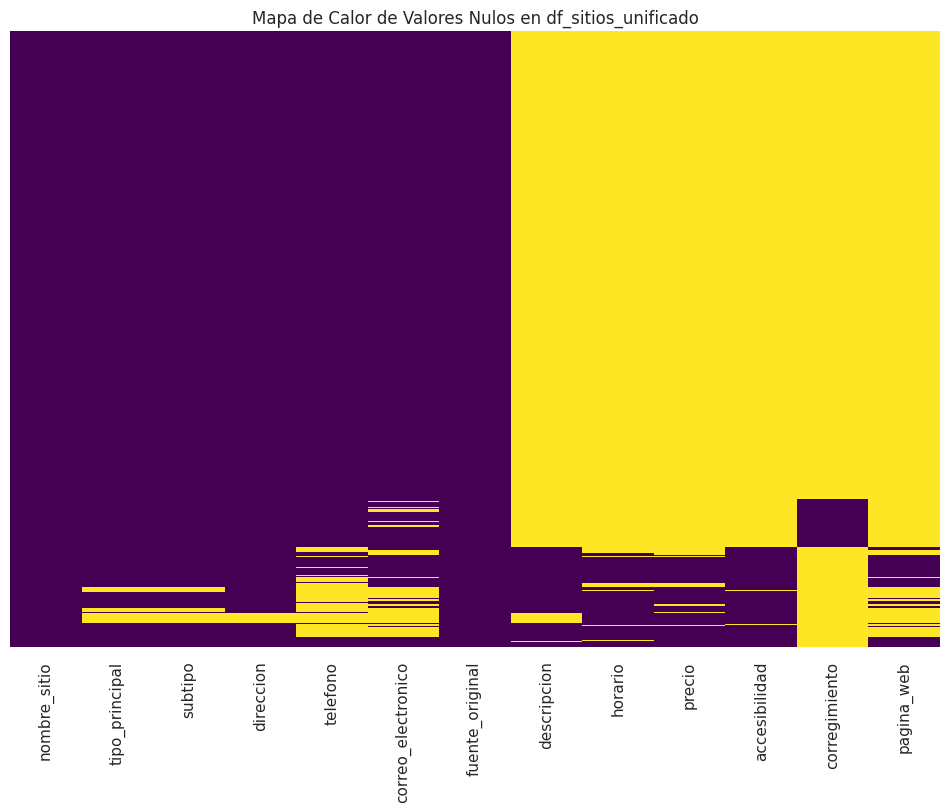

2025-09-21 12:38:20,604 - INFO - Mapa de calor de nulos generado.
2025-09-21 12:38:20,604 - INFO - Realizando verificación puntual (spot-checking).
2025-09-21 12:38:20,608 - INFO - Spot-check para 'HOTEL DANN CALI' fue exitoso.



VERIFICACIÓN 3: SPOT-CHECKING MANUAL
Buscando el registro: 'HOTEL DANN CALI' en el DataFrame unificado...
¡Registro encontrado! Verificando sus datos:
       nombre_sitio tipo_principal subtipo       direccion telefono            correo_electronico fuente_original descripcion horario precio accesibilidad corregimiento pagina_web
59  HOTEL DANN CALI    Alojamiento   HOTEL  CR 1 No. 1  40  8933000  ed-continental@emcali.net.co     alojamiento         NaN     NaN    NaN           NaN           NaN        NaN


In [398]:
# --- Fase 6: Verificaciones Adicionales de Calidad de Datos ---
logging.info("Fase 6: Realizando verificaciones de calidad adicionales en el DataFrame de sitios unificado.")

if 'df_sitios_unificado' in locals():

    # --- Verificación 1: Análisis de Duplicados ---
    print("\n" + "="*50)
    print("VERIFICACIÓN 1: ANÁLISIS DE DUPLICADOS")
    print("="*50)
    logging.info("Verificando la existencia de registros duplicados.")

    total_duplicates = df_sitios_unificado.duplicated().sum()
    print(f"Total de filas completamente duplicadas: {total_duplicates}")
    logging.info(f"Se encontraron {total_duplicates} filas completamente duplicadas.")

    name_duplicates = df_sitios_unificado.duplicated(subset=['nombre_sitio'], keep=False)
    num_name_duplicates = name_duplicates.sum()
    
    print(f"\nSe encontraron {num_name_duplicates} registros con nombres de sitio duplicados.")
    logging.info(f"Se encontraron {num_name_duplicates} registros con 'nombre_sitio' duplicado.")
    
    if num_name_duplicates > 0:
        print("Mostrando los registros con nombres duplicados para inspección:")
        print(df_sitios_unificado[name_duplicates].sort_values(by='nombre_sitio'))

    # --- Verificación 2: Análisis Visual de Datos Faltantes (NaNs) ---
    print("\n" + "="*50)
    print("VERIFICACIÓN 2: ANÁLISIS VISUAL DE DATOS FALTANTES")
    print("="*50)
    logging.info("Generando análisis visual de valores nulos.")

    # Calculando porcentaje de nulos
    missing_percentage = (df_sitios_unificado.isnull().sum() / len(df_sitios_unificado) * 100).sort_values(ascending=False)
    print("Porcentaje de valores nulos por columna:\n")
    print(missing_percentage)

    # Mapa de calor de nulos
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_sitios_unificado.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Mapa de Calor de Valores Nulos en df_sitios_unificado')
    plt.show()
    logging.info("Mapa de calor de nulos generado.")

    # --- Verificación 3: Spot-Checking Manual ---
    print("\n" + "="*50)
    print("VERIFICACIÓN 3: SPOT-CHECKING MANUAL")
    print("="*50)
    logging.info("Realizando verificación puntual (spot-checking).")

    # Ejemplo: Buscamos un hotel específico del archivo original de alojamiento
    hotel_a_buscar = 'HOTEL DANN CALI'
    print(f"Buscando el registro: '{hotel_a_buscar}' en el DataFrame unificado...")
    
    spot_check_result = df_sitios_unificado[df_sitios_unificado['nombre_sitio'] == hotel_a_buscar]
    
    if not spot_check_result.empty:
        print("¡Registro encontrado! Verificando sus datos:")
        print(spot_check_result)
        logging.info(f"Spot-check para '{hotel_a_buscar}' fue exitoso.")
    else:
        print(f"¡Registro '{hotel_a_buscar}' NO encontrado! Esto podría indicar un problema.")
        logging.warning(f"Spot-check para '{hotel_a_buscar}' falló.")

else:
    logging.error("El DataFrame 'df_sitios_unificado' no fue encontrado.")

Bloque 11: Fase 7 - Limpieza y Preprocesamiento de df_visitantes_unificado


In [399]:
# --- Fase 7: Limpieza y Preprocesamiento de df_visitantes_unificado ---
logging.info("Fase 7: Iniciando la limpieza y preprocesamiento de 'df_visitantes_unificado'.")

# Importar una librería para manejar acentos
import unicodedata

def limpiar_nombres_columnas(df):
    """
    Estandariza los nombres de las columnas de un DataFrame:
    - Convierte a minúsculas.
    - Elimina acentos.
    - Reemplaza espacios y caracteres especiales por guiones bajos.
    """
    nuevos_nombres = {}
    for col in df.columns:
        # Normalizar para descomponer acentos
        nombre_sin_acentos = ''.join(c for c in unicodedata.normalize('NFD', col) if unicodedata.category(c) != 'Mn')
        # Reemplazar espacios y caracteres no alfanuméricos
        nombre_limpio = nombre_sin_acentos.lower().replace(' ', '_').replace('-', '_').replace('?', '')
        nuevos_nombres[col] = nombre_limpio
    
    df = df.rename(columns=nuevos_nombres)
    logging.info("Nombres de columnas estandarizados.")
    return df

# Paso 7.1: Aplicar la limpieza de nombres de columnas
# ---------------------------------------------------
logging.info("Paso 7.1: Estandarizando nombres de columnas.")
print("\n" + "="*50)
print("Paso 7.1: Estandarización de Nombres de Columnas")
print("="*50)

if 'df_visitantes_unificado' in locals():
    columnas_originales = df_visitantes_unificado.columns.tolist()
    df_visitantes_limpio = limpiar_nombres_columnas(df_visitantes_unificado)
    columnas_nuevas = df_visitantes_limpio.columns.tolist()

    print("Se han renombrado las columnas de la siguiente manera:")
    # Mostramos un mapeo de los nombres antiguos a los nuevos
    mapeo_columnas = pd.DataFrame({'nombre_original': columnas_originales, 'nombre_nuevo': columnas_nuevas})
    print(mapeo_columnas)
    
    logging.info(f"Mapeo de columnas completado: {len(columnas_originales)} columnas renombradas.")
else:
    logging.error("El DataFrame 'df_visitantes_unificado' no existe para la limpieza.")

2025-09-21 12:38:20,615 - INFO - Fase 7: Iniciando la limpieza y preprocesamiento de 'df_visitantes_unificado'.
2025-09-21 12:38:20,616 - INFO - Paso 7.1: Estandarizando nombres de columnas.
2025-09-21 12:38:20,624 - INFO - Nombres de columnas estandarizados.
2025-09-21 12:38:20,627 - INFO - Mapeo de columnas completado: 31 columnas renombradas.



Paso 7.1: Estandarización de Nombres de Columnas
Se han renombrado las columnas de la siguiente manera:
                                    nombre_original                                     nombre_nuevo
0                                          Encuesta                                         encuesta
1                                             Fecha                                            fecha
2                                               Mes                                              mes
3                              PaÃ­s de procedencia                             paa­s_de_procedencia
4                                            Cuidad                                           cuidad
5                                       Procedencia                                      procedencia
6           Zona procedendia- Visitantes nacionales          zona_procedendia__visitantes_nacionales
7      Zona procedendia- Visitantes internacionales     zona_procedendia__visitantes_in

In [400]:
# Paso 7.2: Análisis de Valores Nulos
# -----------------------------------
logging.info("Paso 7.2: Analizando valores nulos.")
print("\n" + "="*50)
print("Paso 7.2: Análisis de Valores Nulos")
print("="*50)

if 'df_visitantes_limpio' in locals():
    nulos_conteo = df_visitantes_limpio.isnull().sum()
    nulos_porcentaje = (nulos_conteo / len(df_visitantes_limpio) * 100).round(2)
    
    analisis_nulos = pd.DataFrame({
        'conteo_nulos': nulos_conteo,
        'porcentaje_nulos': nulos_porcentaje
    }).sort_values(by='porcentaje_nulos', ascending=False)

    print("Análisis de valores nulos por columna (ordenado por porcentaje):")
    print(analisis_nulos)
    logging.info("Análisis de valores nulos completado.")

2025-09-21 12:38:20,633 - INFO - Paso 7.2: Analizando valores nulos.



Paso 7.2: Análisis de Valores Nulos


2025-09-21 12:38:20,659 - INFO - Análisis de valores nulos completado.


Análisis de valores nulos por columna (ordenado por porcentaje):
                                                 conteo_nulos  porcentaje_nulos
otro_alojamiento_cual                                   16954            99.990
otro_alojamiento_cual                                   16913            99.750
otro_idioma_cual                                        16805            99.110
otro_idioma_cual                                        16630            98.080
zona_procedendia__visitantes_nacionales                 16584            97.810
zona_procedendia__visitantes_internacionales            16186            95.460
rango_de_tiempo                                         14765            87.080
zona_de_procedencia__visitantes_internacionales         14724            86.840
zona_procedencia__visitantes_internacionales            14069            82.970
zona_procedencia__visitantes_nacionales                 13193            77.810
pais_de_procedencia                                    

In [401]:
# Paso 7.3: Corrección de Tipos de Datos
# --------------------------------------
logging.info("Paso 7.3: Corrigiendo tipos de datos.")
print("\n" + "="*50)
print("Paso 7.3: Corrección de Tipos de Datos")
print("="*50)

if 'df_visitantes_limpio' in locals():
    print("Tipos de datos ANTES de la corrección:")
    print(df_visitantes_limpio.dtypes)
    
    # Convertir 'fecha' a datetime
    df_visitantes_limpio['fecha'] = pd.to_datetime(df_visitantes_limpio['fecha'], errors='coerce')
    logging.info("Columna 'fecha' convertida a tipo datetime.")
    
    # Convertir columnas numéricas que puedan ser 'object'
    columnas_numericas = ['encuesta', 'edad', 'tiempo_de_estancia']
    for col in columnas_numericas:
        if col in df_visitantes_limpio.columns:
            df_visitantes_limpio[col] = pd.to_numeric(df_visitantes_limpio[col], errors='coerce')
            logging.info(f"Columna '{col}' convertida a tipo numérico.")
    
    print("\nTipos de datos DESPUÉS de la corrección:")
    print(df_visitantes_limpio.dtypes)
    logging.info("Corrección de tipos de datos finalizada.")

2025-09-21 12:38:20,667 - INFO - Paso 7.3: Corrigiendo tipos de datos.



Paso 7.3: Corrección de Tipos de Datos
Tipos de datos ANTES de la corrección:
encuesta                                           float64
fecha                                               object
mes                                                 object
paa­s_de_procedencia                                object
cuidad                                              object
procedencia                                         object
zona_procedendia__visitantes_nacionales             object
zona_procedendia__visitantes_internacionales        object
sexo                                                object
edad_rangos                                         object
motivo_viaje                                        object
otro_motivo_de_viaje_o_consulta_pit_cual            object
idioma                                              object
otro_idioma_cual                                    object
alojamiento                                         object
otro_alojamiento_cual               

2025-09-21 12:38:20,689 - INFO - Columna 'fecha' convertida a tipo datetime.
2025-09-21 12:38:20,691 - INFO - Columna 'encuesta' convertida a tipo numérico.
2025-09-21 12:38:20,693 - INFO - Columna 'edad' convertida a tipo numérico.
2025-09-21 12:38:20,695 - INFO - Columna 'tiempo_de_estancia' convertida a tipo numérico.
2025-09-21 12:38:20,696 - INFO - Corrección de tipos de datos finalizada.



Tipos de datos DESPUÉS de la corrección:
encuesta                                                  float64
fecha                                              datetime64[ns]
mes                                                        object
paa­s_de_procedencia                                       object
cuidad                                                     object
procedencia                                                object
zona_procedendia__visitantes_nacionales                    object
zona_procedendia__visitantes_internacionales               object
sexo                                                       object
edad_rangos                                                object
motivo_viaje                                               object
otro_motivo_de_viaje_o_consulta_pit_cual                   object
idioma                                                     object
otro_idioma_cual                                           object
alojamiento                       

In [402]:
# Paso 7.4 (Revisado y Optimizado): Estandarización de Datos Categóricos
# ---------------------------------------------------------------------
logging.info("Paso 7.4: Estandarizando datos categóricos, incluyendo manejo de columnas duplicadas.")
print("\n" + "="*50)
print("Paso 7.4: Estandarización de Datos Categóricos")
print("="*50)

if 'df_visitantes_limpio' in locals():
    
    # --- MANEJO EFICIENTE DE COLUMNAS DUPLICADAS ---
    duplicated_cols = df_visitantes_limpio.columns[df_visitantes_limpio.columns.duplicated(keep=False)]
    
    if not duplicated_cols.empty:
        unique_duplicated_names = duplicated_cols.unique()
        logging.warning(f"Se encontraron columnas duplicadas: {unique_duplicated_names.tolist()}. Procediendo a unificarlas eficientemente.")
        print(f"Se encontraron columnas duplicadas: {unique_duplicated_names.tolist()}. Unificando...")

        # Separar las columnas no duplicadas
        df_no_dupes = df_visitantes_limpio.loc[:, ~df_visitantes_limpio.columns.duplicated(keep=False)]
        
        # Consolidar cada grupo de columnas duplicadas
        for col_name in unique_duplicated_names:
            # Seleccionar el sub-DataFrame de columnas duplicadas
            df_dupe_group = df_visitantes_limpio.loc[:, df_visitantes_limpio.columns == col_name]
            # Usar 'bfill' (backfill) para consolidar los valores en la primera columna
            # Esto llena los NaNs de una columna con el valor de la siguiente columna en la misma fila
            consolidated_series = df_dupe_group.bfill(axis=1).iloc[:, 0]
            # Añadir la columna consolidada al DataFrame de no duplicados
            df_no_dupes.loc[:, col_name] = consolidated_series

        
        df_visitantes_limpio = df_no_dupes
        logging.info("Columnas duplicadas unificadas exitosamente.")
        print("Unificación de columnas duplicadas completada.")
    
    # --- Procedimiento de estandarización de texto (ahora sobre un DF limpio) ---
    columnas_categoricas = df_visitantes_limpio.select_dtypes(include=['object']).columns
    print(f"\nEstandarizando {len(columnas_categoricas)} columnas categóricas (minúsculas, sin espacios extra)...")

    for col in columnas_categoricas:
        try:
            df_visitantes_limpio[col] = df_visitantes_limpio[col].fillna('').astype(str).str.lower().str.strip()
        except Exception as e:
            logging.error(f"No se pudo estandarizar la columna '{col}': {e}")
            
    print("Estandarización completada.")
    print("\nEjemplo de estandarización en 'motivo_viaje':")
    print(df_visitantes_limpio['motivo_viaje'].value_counts().head(10))
    logging.info("Estandarización básica de columnas categóricas completada.")

else:
    logging.error("El DataFrame 'df_visitantes_limpio' no fue encontrado.")

2025-09-21 12:38:20,737 - INFO - Paso 7.4: Estandarizando datos categóricos, incluyendo manejo de columnas duplicadas.
2025-09-21 12:38:20,738 - WARNING - Se encontraron columnas duplicadas: ['otro_idioma_cual', 'otro_alojamiento_cual', 'pais_de_procedencia']. Procediendo a unificarlas eficientemente.



Paso 7.4: Estandarización de Datos Categóricos
Se encontraron columnas duplicadas: ['otro_idioma_cual', 'otro_alojamiento_cual', 'pais_de_procedencia']. Unificando...


/tmp/ipykernel_10754/3242705508.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  consolidated_series = df_dupe_group.bfill(axis=1).iloc[:, 0]
/tmp/ipykernel_10754/3242705508.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dupes.loc[:, col_name] = consolidated_series
/tmp/ipykernel_10754/3242705508.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.s

Unificación de columnas duplicadas completada.

Estandarizando 23 columnas categóricas (minúsculas, sin espacios extra)...
Estandarización completada.

Ejemplo de estandarización en 'motivo_viaje':
motivo_viaje
otros                        5817
cultural                     5124
recreacional o vacacional    2915
turismo rural                 849
negocios                      669
educación y/o formación       567
visita parientes o amigos     543
                              244
educaciã³n y/o formaciã³n      90
salud                          88
Name: count, dtype: int64


In [403]:
# Paso 7.5: Detección y Manejo de Duplicados
# ------------------------------------------
logging.info("Paso 7.5: Buscando y eliminando duplicados.")
print("\n" + "="*50)
print("Paso 7.5: Detección y Manejo de Duplicados")
print("="*50)

if 'df_visitantes_limpio' in locals():
    duplicados_antes = df_visitantes_limpio.duplicated().sum()
    print(f"Número de filas completamente duplicadas ANTES de la limpieza: {duplicados_antes}")
    
    if duplicados_antes > 0:
        df_visitantes_limpio.drop_duplicates(inplace=True)
        print(f"Se han eliminado {duplicados_antes} filas duplicadas.")
        print(f"Nuevo total de filas: {len(df_visitantes_limpio)}")
    
    logging.info(f"Se encontraron y eliminaron {duplicados_antes} filas duplicadas.")
    logging.info("Proceso de limpieza y preprocesamiento de 'df_visitantes_unificado' finalizado.")

2025-09-21 12:38:21,782 - INFO - Paso 7.5: Buscando y eliminando duplicados.
2025-09-21 12:38:21,843 - INFO - Se encontraron y eliminaron 243 filas duplicadas.
2025-09-21 12:38:21,844 - INFO - Proceso de limpieza y preprocesamiento de 'df_visitantes_unificado' finalizado.



Paso 7.5: Detección y Manejo de Duplicados
Número de filas completamente duplicadas ANTES de la limpieza: 243
Se han eliminado 243 filas duplicadas.
Nuevo total de filas: 16713


Bloque 12: Fase 8 - Ingeniería de Características (Feature Engineering)


In [404]:
# --- Bloque 12 (CORREGIDO): Fase 8 - Ingeniería de Características ---
logging.info("Fase 8: Iniciando la creación de nuevas características (Feature Engineering).")

if 'df_visitantes_limpio' in locals():

    # --- 1. Estandarización de Componentes Temporales (Método Robusto) ---
    logging.info("Estandarizando la columna 'mes' a partir de los datos originales.")
    
    # Nos aseguramos de que la columna 'mes' sea de tipo string y la limpiamos
    # Esto es más robusto que depender de la columna 'fecha', que puede tener errores.
    df_visitantes_limpio['mes'] = df_visitantes_limpio['mes'].astype(str).str.strip().str.capitalize()
    
    # Extraemos el día de la semana, manejando posibles errores en 'fecha'
    df_visitantes_limpio['dia_semana'] = df_visitantes_limpio['fecha'].dt.day_name().map({
        'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
        'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
    })

    # --- 2. Creación de Segmentos Clave (Sin cambios) ---
    logging.info("Creando la columna 'tipo_visitante' (Nacional/Extranjero).")
    df_visitantes_limpio['tipo_visitante'] = np.where(
        df_visitantes_limpio['procedencia'] == 'nacional', 
        'Nacional', 
        'Extranjero'
    )

    # --- 3. Binning de Variables Numéricas (Sin cambios) ---
    logging.info("Creando la columna 'grupo_edad' a partir de la columna 'edad'.")
    bins_edad = [0, 17, 35, 60, 120]
    labels_edad = ['Menor (0-17)', 'Joven Adulto (18-35)', 'Adulto (36-60)', 'Senior (61+)']
    df_visitantes_limpio['grupo_edad'] = pd.cut(
        df_visitantes_limpio['edad'],
        bins=bins_edad,
        labels=labels_edad,
        right=True
    )

    # --- Verificación ---
    print("\nVERIFICACIÓN DE LAS NUEVAS COLUMNAS CREADAS (MÉTODO ROBUSTO)")
    columnas_verificacion = ['ano', 'mes', 'dia_semana', 'tipo_visitante', 'grupo_edad']
    print(df_visitantes_limpio[columnas_verificacion].head())
    print("\nConteo de valores en la nueva columna 'mes':")
    print(df_visitantes_limpio['mes'].value_counts())
    
    logging.info("Fase 8 completada con el método robusto.")

else:
    logging.error("El DataFrame 'df_visitantes_limpio' no fue encontrado.")

2025-09-21 12:38:21,852 - INFO - Fase 8: Iniciando la creación de nuevas características (Feature Engineering).
2025-09-21 12:38:21,853 - INFO - Estandarizando la columna 'mes' a partir de los datos originales.
2025-09-21 12:38:21,864 - INFO - Creando la columna 'tipo_visitante' (Nacional/Extranjero).
2025-09-21 12:38:21,867 - INFO - Creando la columna 'grupo_edad' a partir de la columna 'edad'.
2025-09-21 12:38:21,874 - INFO - Fase 8 completada con el método robusto.



VERIFICACIÓN DE LAS NUEVAS COLUMNAS CREADAS (MÉTODO ROBUSTO)
    ano      mes dia_semana tipo_visitante grupo_edad
0  2015  Febrero     Martes     Extranjero        NaN
1  2015  Febrero  Miércoles     Extranjero        NaN
2  2015  Febrero  Miércoles     Extranjero        NaN
3  2015  Febrero  Miércoles     Extranjero        NaN
4  2015  Febrero  Miércoles     Extranjero        NaN

Conteo de valores en la nueva columna 'mes':
mes
Diciembre     3013
Octubre       2199
Septiembre    2195
Agosto        1764
Julio         1735
Noviembre     1707
Mayo           914
Junio          898
Marzo          729
Abril          713
Febrero        572
Enero          273
                 1
Name: count, dtype: int64


In [405]:
# --- Fase 9: Análisis Univariado ---
logging.info("Fase 9: Iniciando el Análisis Univariado.")

# Configuración estética para los gráficos de Seaborn
sns.set_theme(style="whitegrid")

2025-09-21 12:38:21,879 - INFO - Fase 9: Iniciando el Análisis Univariado.


2025-09-21 12:38:21,912 - INFO - Generando gráfico de distribución del Motivo del Viaje.


/tmp/ipykernel_10754/854494427.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=motivo_counts.values, y=motivo_counts.index, palette='viridis', orient='h')


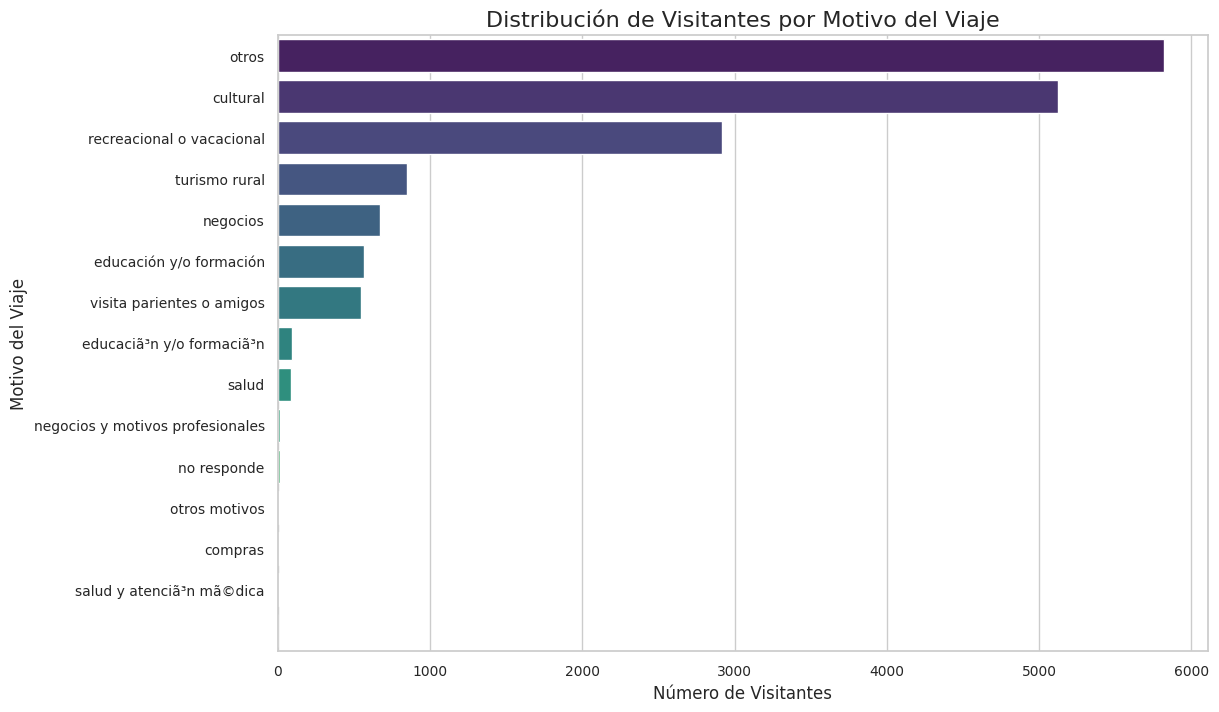

In [406]:
# 9.1 Distribución del Motivo del Viaje
logging.info("Generando gráfico de distribución del Motivo del Viaje.")

plt.figure(figsize=(12, 8))

# Contamos la frecuencia de cada motivo de viaje
motivo_counts = df_visitantes_limpio['motivo_viaje'].value_counts()

# Creamos el gráfico de barras horizontales
sns.barplot(x=motivo_counts.values, y=motivo_counts.index, palette='viridis', orient='h')

# Añadimos títulos y etiquetas para mayor claridad
plt.title('Distribución de Visitantes por Motivo del Viaje', fontsize=16)
plt.xlabel('Número de Visitantes', fontsize=12)
plt.ylabel('Motivo del Viaje', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostramos el gráfico
plt.show()

2025-09-21 12:38:22,146 - INFO - Generando gráfico de distribución por Tipo de Visitante.


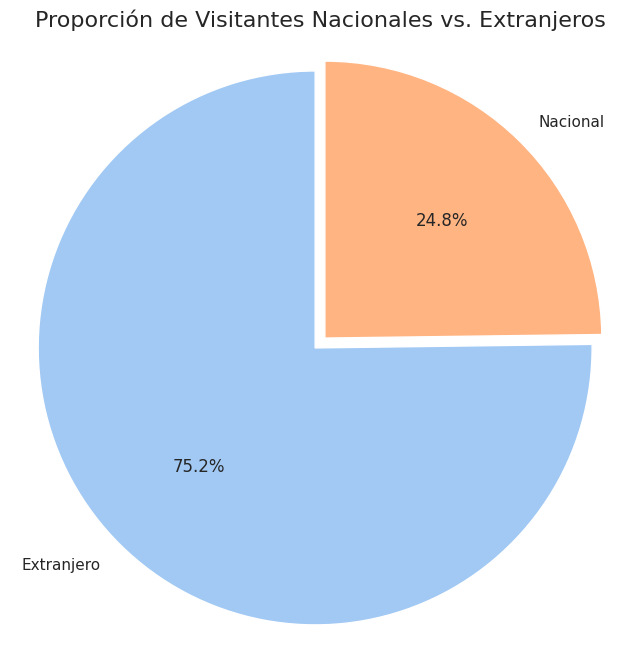

In [407]:
# 9.2 Distribución por Tipo de Visitante
logging.info("Generando gráfico de distribución por Tipo de Visitante.")

plt.figure(figsize=(8, 8))

# Contamos la frecuencia de cada tipo de visitante
tipo_counts = df_visitantes_limpio['tipo_visitante'].value_counts()

# Creamos el gráfico de torta
plt.pie(tipo_counts, 
        labels=tipo_counts.index, 
        autopct='%1.1f%%',  # Formato para mostrar porcentajes
        startangle=90,      # Inicia el primer segmento en la parte superior
        colors=sns.color_palette('pastel'),
        explode=[0.05, 0]   # Resalta ligeramente el primer segmento (el más grande)
       )

# Aseguramos que el gráfico sea un círculo
plt.axis('equal')

# Añadimos título
plt.title('Proporción de Visitantes Nacionales vs. Extranjeros', fontsize=16)

# Mostramos el gráfico
plt.show()

2025-09-21 12:38:22,201 - INFO - Generando gráfico corregido del Top 10 de países de origen.
/tmp/ipykernel_10754/967451883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pais_counts_corregido.values, y=pais_counts_corregido.index, palette='plasma', orient='h')


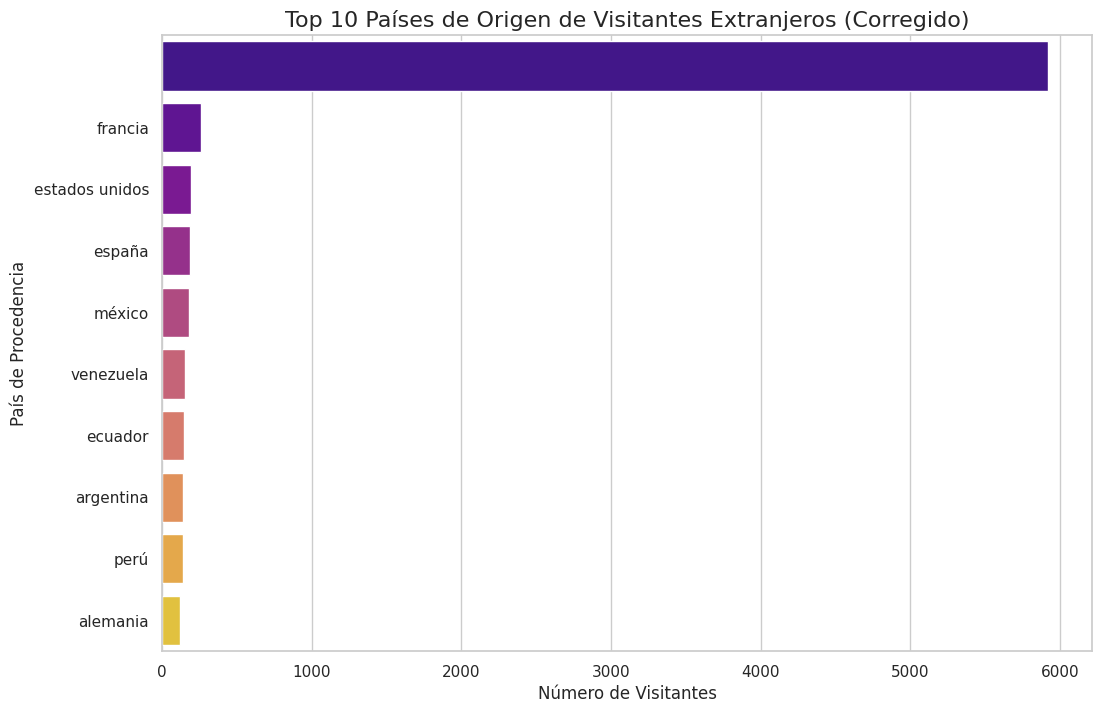

In [408]:
# 10.3 Top 10 Países de Origen de Extranjeros (Corregido)
logging.info("Generando gráfico corregido del Top 10 de países de origen.")

plt.figure(figsize=(12, 8))

# Razón de la Corrección:
# El gráfico anterior estaba sesgado por la presencia de "colombia".
# Para obtener una visión real de los mercados internacionales, primero filtramos.

# ---> LÍNEA CLAVE AÑADIDA <---
# Nos aseguramos de crear el DataFrame 'df_extranjeros' aquí mismo, dentro de la celda.
# Así, esta celda ya no depende de ninguna otra.
df_extranjeros = df_visitantes_limpio[df_visitantes_limpio['tipo_visitante'] == 'Extranjero']
# -----------------------------

# Ahora sí, excluimos a Colombia y luego contamos los 10 principales.
df_extranjeros_sin_colombia = df_extranjeros[df_extranjeros['pais_de_procedencia'] != 'colombia']
pais_counts_corregido = df_extranjeros_sin_colombia['pais_de_procedencia'].value_counts().head(10)

# Creamos el gráfico de barras
sns.barplot(x=pais_counts_corregido.values, y=pais_counts_corregido.index, palette='plasma', orient='h')

plt.title('Top 10 Países de Origen de Visitantes Extranjeros (Corregido)', fontsize=16)
plt.xlabel('Número de Visitantes', fontsize=12)
plt.ylabel('País de Procedencia', fontsize=12)
plt.show()

2025-09-21 12:38:22,446 - INFO - Generando histograma de la distribución de Edad.


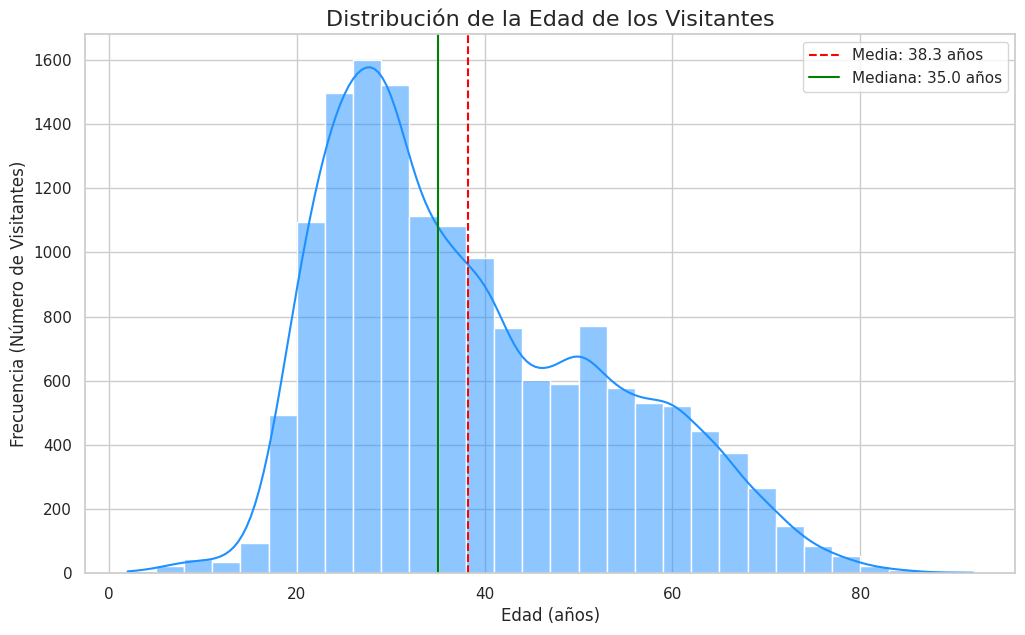

In [409]:
# 9.4 Distribución de la Edad de los Visitantes
logging.info("Generando histograma de la distribución de Edad.")

plt.figure(figsize=(12, 7))

# Creamos el histograma con una curva de densidad (KDE)
# Usamos .dropna() para ignorar los valores nulos en la columna 'edad' al graficar
sns.histplot(df_visitantes_limpio['edad'].dropna(), bins=30, kde=True, color='dodgerblue')

# Calculamos la edad media y la mediana para añadirlas como referencia
edad_media = df_visitantes_limpio['edad'].mean()
edad_mediana = df_visitantes_limpio['edad'].median()

# Añadimos líneas verticales para la media y la mediana
plt.axvline(edad_media, color='red', linestyle='--', label=f'Media: {edad_media:.1f} años')
plt.axvline(edad_mediana, color='green', linestyle='-', label=f'Mediana: {edad_mediana:.1f} años')

# Añadimos títulos, etiquetas y leyenda
plt.title('Distribución de la Edad de los Visitantes', fontsize=16)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia (Número de Visitantes)', fontsize=12)
plt.legend()

# Mostramos el gráfico
plt.show()

2025-09-21 12:38:22,757 - INFO - Generando Box Plot de la distribución del Tiempo de Estancia.


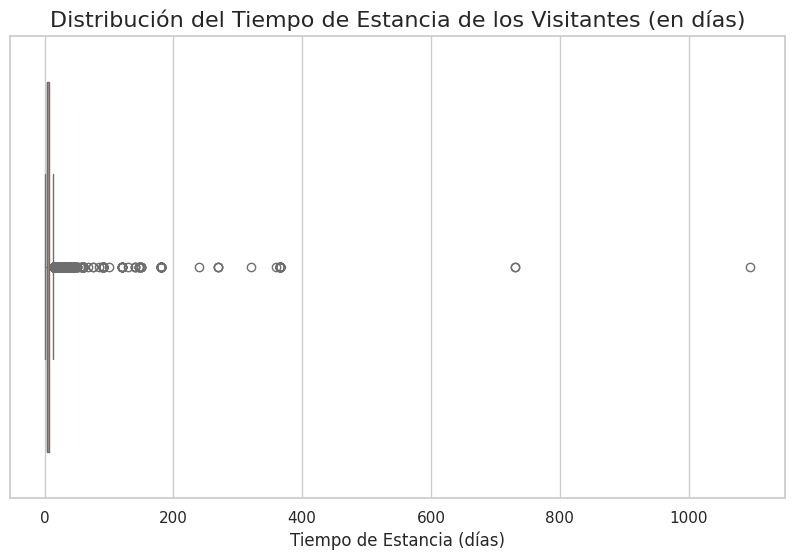

In [410]:
# 9.5 Distribución del Tiempo de Estancia
logging.info("Generando Box Plot de la distribución del Tiempo de Estancia.")

plt.figure(figsize=(10, 6))

# Creamos un box plot para la variable 'tiempo_de_estancia'
# El box plot es ideal para ver la mediana, los cuartiles y los outliers
sns.boxplot(x=df_visitantes_limpio['tiempo_de_estancia'].dropna(), color='lightcoral')

# Añadimos títulos y etiquetas
plt.title('Distribución del Tiempo de Estancia de los Visitantes (en días)', fontsize=16)
plt.xlabel('Tiempo de Estancia (días)', fontsize=12)

# Mostramos el gráfico
plt.show()

2025-09-21 12:38:22,868 - INFO - Fase 10: Iniciando el Análisis Bivariado para encontrar relaciones entre variables.
2025-09-21 12:38:22,870 - INFO - Generando gráfico: Motivo del Viaje vs. Tipo de Visitante.


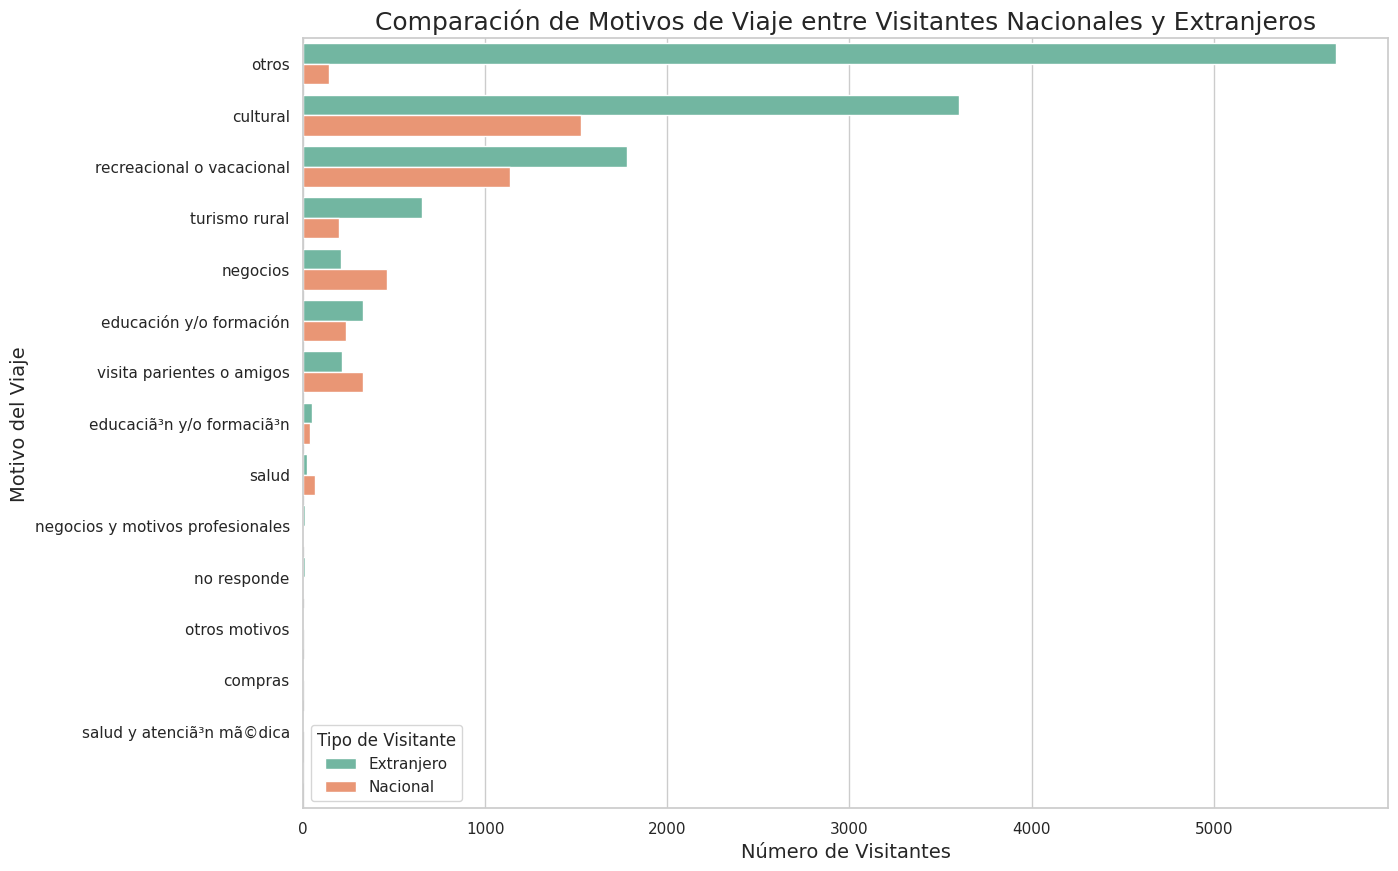

In [411]:
# --- Fase 10: Análisis Bivariado ---
logging.info("Fase 10: Iniciando el Análisis Bivariado para encontrar relaciones entre variables.")

# 10.1 Motivo del Viaje vs. Tipo de Visitante
logging.info("Generando gráfico: Motivo del Viaje vs. Tipo de Visitante.")

plt.figure(figsize=(14, 10))

# Razón del Gráfico: Gráfico de Barras Agrupadas
# Queremos comparar directamente los motivos de viaje entre Nacionales y Extranjeros.
# Un gráfico agrupado es perfecto para poner las barras de cada categoría una al lado de la otra
# y facilita la comparación visual inmediata.
sns.countplot(y='motivo_viaje', 
              hue='tipo_visitante', 
              data=df_visitantes_limpio, 
              order=df_visitantes_limpio['motivo_viaje'].value_counts().index, # Ordena por popularidad
              palette='Set2')

plt.title('Comparación de Motivos de Viaje entre Visitantes Nacionales y Extranjeros', fontsize=18)
plt.xlabel('Número de Visitantes', fontsize=14)
plt.ylabel('Motivo del Viaje', fontsize=14)
plt.legend(title='Tipo de Visitante')
plt.show()

2025-09-21 12:38:23,081 - INFO - Generando gráfico: Distribución de Edad por Tipo de Visitante.
/tmp/ipykernel_10754/2899805793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='tipo_visitante', y='edad', data=df_visitantes_limpio, palette='pastel')


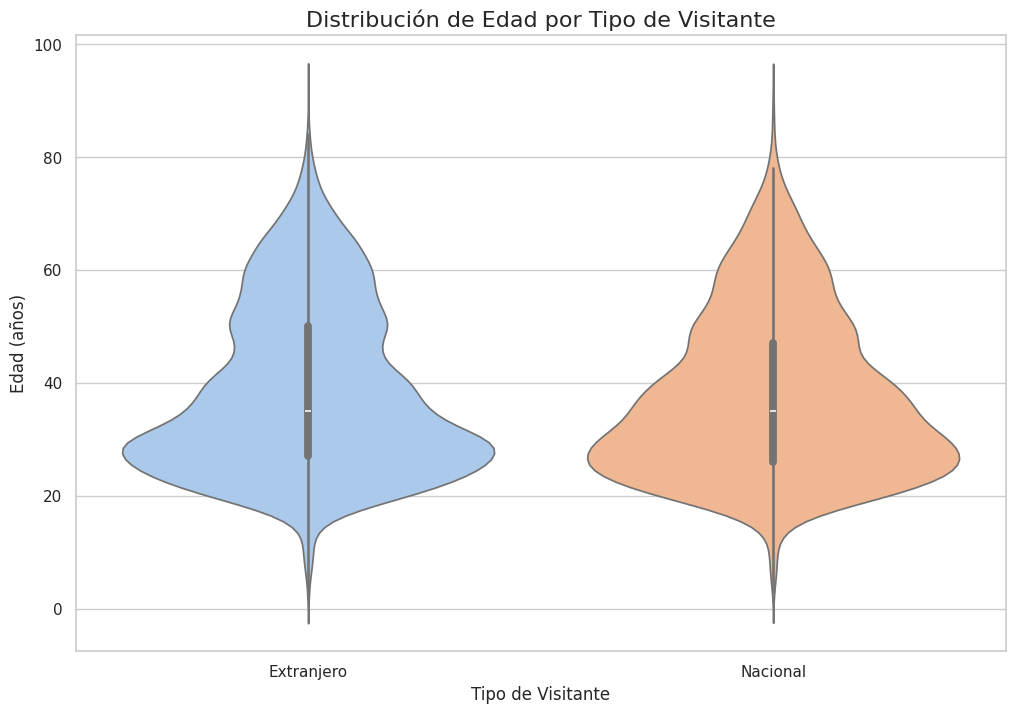

In [412]:
# 10.2 Distribución de Edad por Tipo de Visitante
logging.info("Generando gráfico: Distribución de Edad por Tipo de Visitante.")

plt.figure(figsize=(12, 8))

# Razón del Gráfico: Gráfico de Violín
# Este gráfico es superior a un box plot para comparar distribuciones. No solo muestra
# la mediana y los cuartiles, sino también la densidad de los datos (dónde se concentran
# las edades). Es ideal para ver si el perfil de edad de los extranjeros es diferente
# al de los nacionales (ej. más concentrado en una franja de edad).
sns.violinplot(x='tipo_visitante', y='edad', data=df_visitantes_limpio, palette='pastel')

plt.title('Distribución de Edad por Tipo de Visitante', fontsize=16)
plt.xlabel('Tipo de Visitante', fontsize=12)
plt.ylabel('Edad (años)', fontsize=12)
plt.show()

2025-09-21 12:38:23,337 - INFO - Generando Heatmap de estacionalidad (visitantes por mes y año).


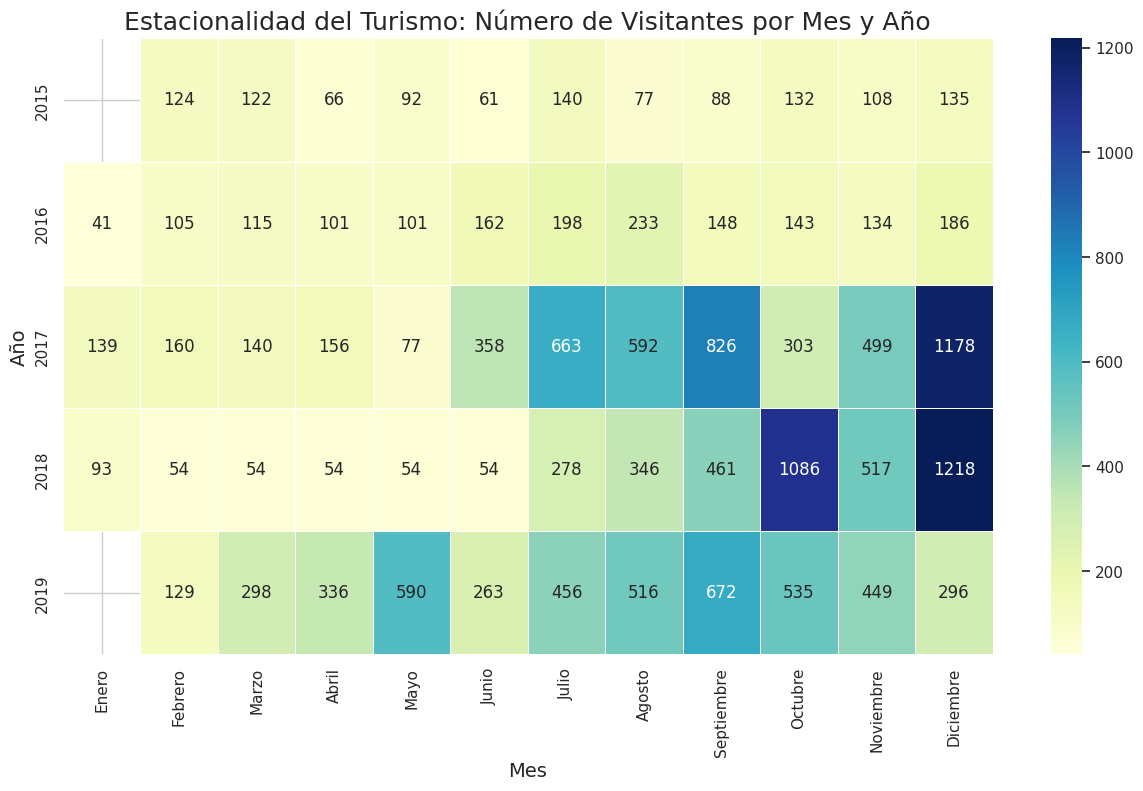

In [413]:
# 10.4 Estacionalidad del Turismo (Visitantes por Mes y Año)
logging.info("Generando Heatmap de estacionalidad (visitantes por mes y año).")

# Preparamos los datos: agrupamos por año y mes y contamos los visitantes
estacionalidad = df_visitantes_limpio.groupby(['ano', 'mes'])['encuesta'].count().unstack()

# Ordenamos los meses cronológicamente para el gráfico
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
estacionalidad = estacionalidad[meses_ordenados]

plt.figure(figsize=(15, 8))

# Razón del Gráfico: Mapa de Calor (Heatmap)
# Un mapa de calor es mucho más informativo que un simple gráfico de líneas.
# Nos permite ver dos patrones a la vez:
# 1. Crecimiento anual (los colores se intensifican verticalmente).
# 2. Picos estacionales dentro de cada año (los colores se intensifican horizontalmente, ej. en Diciembre).
sns.heatmap(estacionalidad, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)

plt.title('Estacionalidad del Turismo: Número de Visitantes por Mes y Año', fontsize=18)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Año', fontsize=14)
plt.show()

2025-09-21 12:38:23,840 - INFO - Fase 11: Iniciando el Análisis Multivariado para descubrir patrones complejos.
2025-09-21 12:38:23,840 - INFO - Generando gráfico: Relación entre Edad y Tiempo de Estancia.


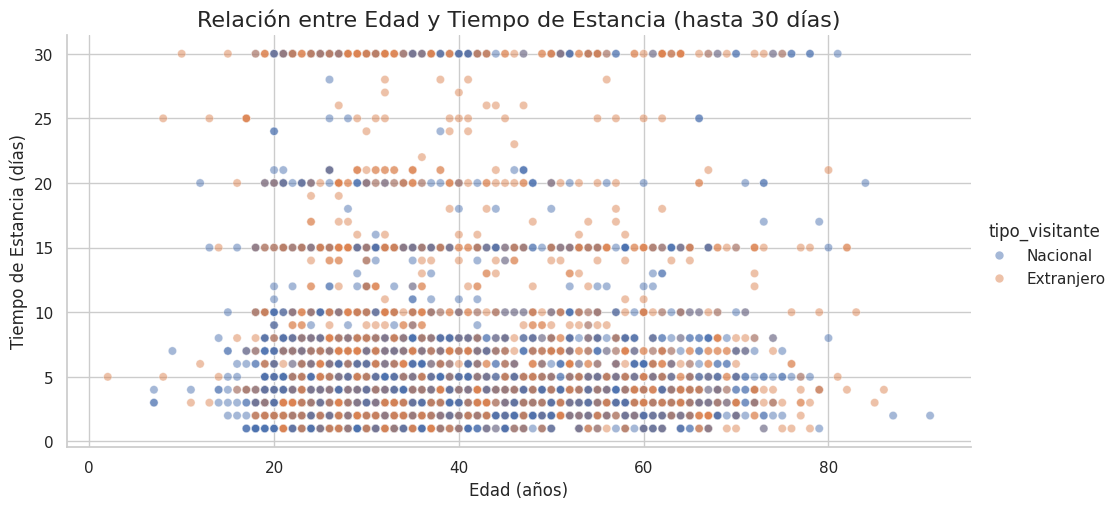

In [414]:
# --- Fase 11: Análisis Multivariado y de Segmentos ---
logging.info("Fase 11: Iniciando el Análisis Multivariado para descubrir patrones complejos.")

# 11.1 Relación entre Edad y Tiempo de Estancia
logging.info("Generando gráfico: Relación entre Edad y Tiempo de Estancia.")

# Razón del Gráfico: Scatter Plot con Líneas de Tendencia (usando relplot)
# Un scatter plot es la mejor forma de visualizar la relación entre dos variables numéricas.
# Queremos ver si existe una correlación entre la edad de un visitante y cuántos días se queda.
# Usamos 'hue' para separar por tipo_visitante, lo que nos permite ver si esta tendencia
# es diferente para nacionales y extranjeros. El gráfico nos ayuda a responder:
# "¿Los turistas más jóvenes tienden a quedarse más o menos tiempo que los mayores?"

# Filtramos outliers en tiempo_de_estancia para una mejor visualización de la tendencia principal
df_filtrado_estancia = df_visitantes_limpio[df_visitantes_limpio['tiempo_de_estancia'] <= 30]

sns.relplot(x='edad', 
            y='tiempo_de_estancia', 
            hue='tipo_visitante',
            data=df_filtrado_estancia, 
            kind='scatter', 
            aspect=2, # Hace el gráfico más ancho
            alpha=0.5)

plt.title('Relación entre Edad y Tiempo de Estancia (hasta 30 días)', fontsize=16)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Tiempo de Estancia (días)', fontsize=12)
plt.show()

2025-09-21 12:38:24,296 - INFO - Generando gráfico: Preferencia de Alojamiento por Tipo de Visitante.


<Figure size 1400x1000 with 0 Axes>

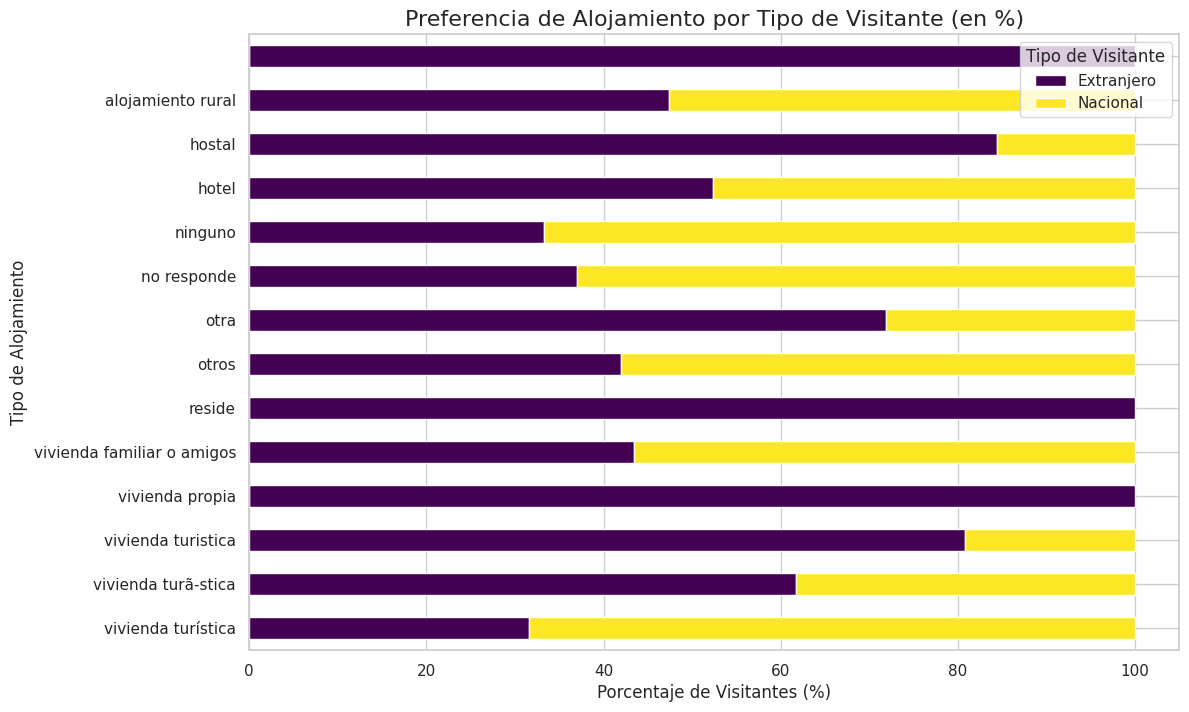

In [415]:
# 11.2 Preferencia de Alojamiento según el Tipo de Visitante
logging.info("Generando gráfico: Preferencia de Alojamiento por Tipo de Visitante.")

plt.figure(figsize=(14, 10))

# Razón del Gráfico: Gráfico de Barras Apiladas al 100%
# Este gráfico es ideal para comparar proporciones. En lugar de mostrar el número total,
# nos muestra el porcentaje de nacionales vs. extranjeros para CADA tipo de alojamiento.
# Así, podemos responder fácilmente: "¿Los extranjeros prefieren proporcionalmente más los hoteles
# que los nacionales, quienes quizás prefieren quedarse en viviendas de familiares?"

# Preparamos los datos: creamos una tabla de contingencia y la normalizamos a porcentajes
contingency_table = pd.crosstab(df_visitantes_limpio['alojamiento'], 
                                df_visitantes_limpio['tipo_visitante'], 
                                normalize='index') * 100

contingency_table.plot(kind='barh', 
                       stacked=True, 
                       figsize=(12, 8), 
                       colormap='viridis')

plt.title('Preferencia de Alojamiento por Tipo de Visitante (en %)', fontsize=16)
plt.xlabel('Porcentaje de Visitantes (%)', fontsize=12)
plt.ylabel('Tipo de Alojamiento', fontsize=12)
plt.legend(title='Tipo de Visitante')
plt.gca().invert_yaxis() # Pone la categoría más grande arriba
plt.show()

2025-09-21 12:38:24,463 - INFO - Generando gráfico: Patrones de llegada por día de la semana.


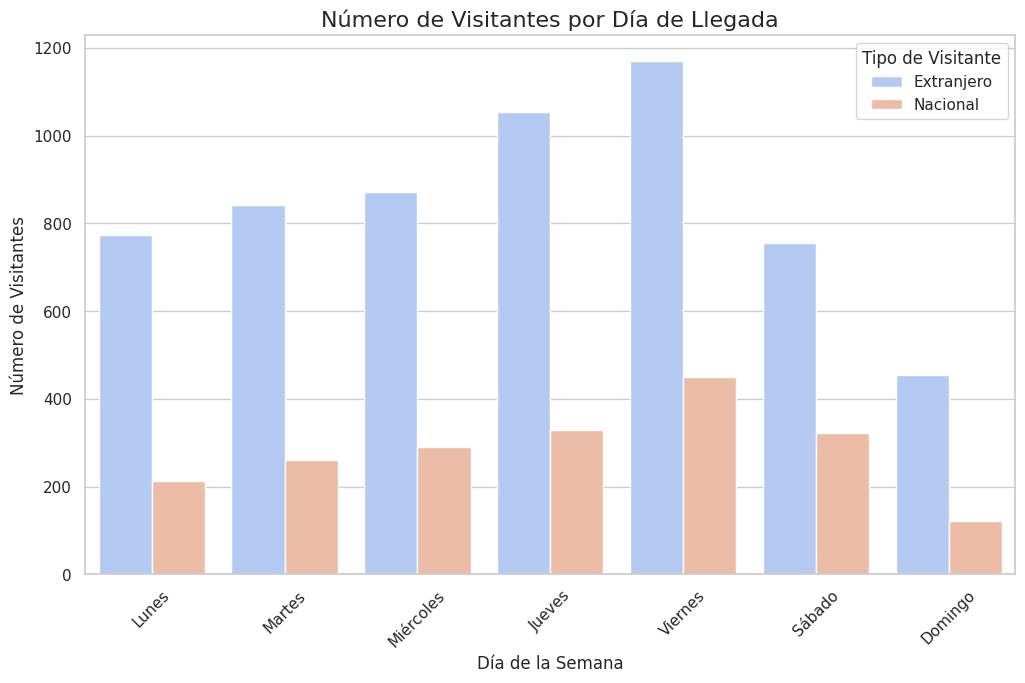

In [416]:
# 11.3 Patrones de Llegada Semanales por Tipo de Visitante
logging.info("Generando gráfico: Patrones de llegada por día de la semana.")

plt.figure(figsize=(12, 7))

# Razón del Gráfico: Gráfico de Líneas
# Aunque un gráfico de barras funcionaría, un gráfico de líneas es excelente para
# mostrar un patrón a lo largo de un ciclo ordenado como la semana. Nos permite
# identificar visualmente los picos de llegada (ej. viernes) y comparar la "forma"
# de la semana entre nacionales y extranjeros. Responde a:
# "¿El flujo de turistas tiene un ciclo semanal? ¿Llegan más los fines de semana?"

# Ordenamos los días de la semana para una correcta visualización
dias_ordenados = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

sns.countplot(x='dia_semana', 
              hue='tipo_visitante', 
              data=df_visitantes_limpio,
              order=dias_ordenados,
              palette='coolwarm')

plt.title('Número de Visitantes por Día de Llegada', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Número de Visitantes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Visitante')
plt.show()

2025-09-21 12:38:24,624 - INFO - Generando Heatmap: Preferencias de Viaje por Grupo de Edad.


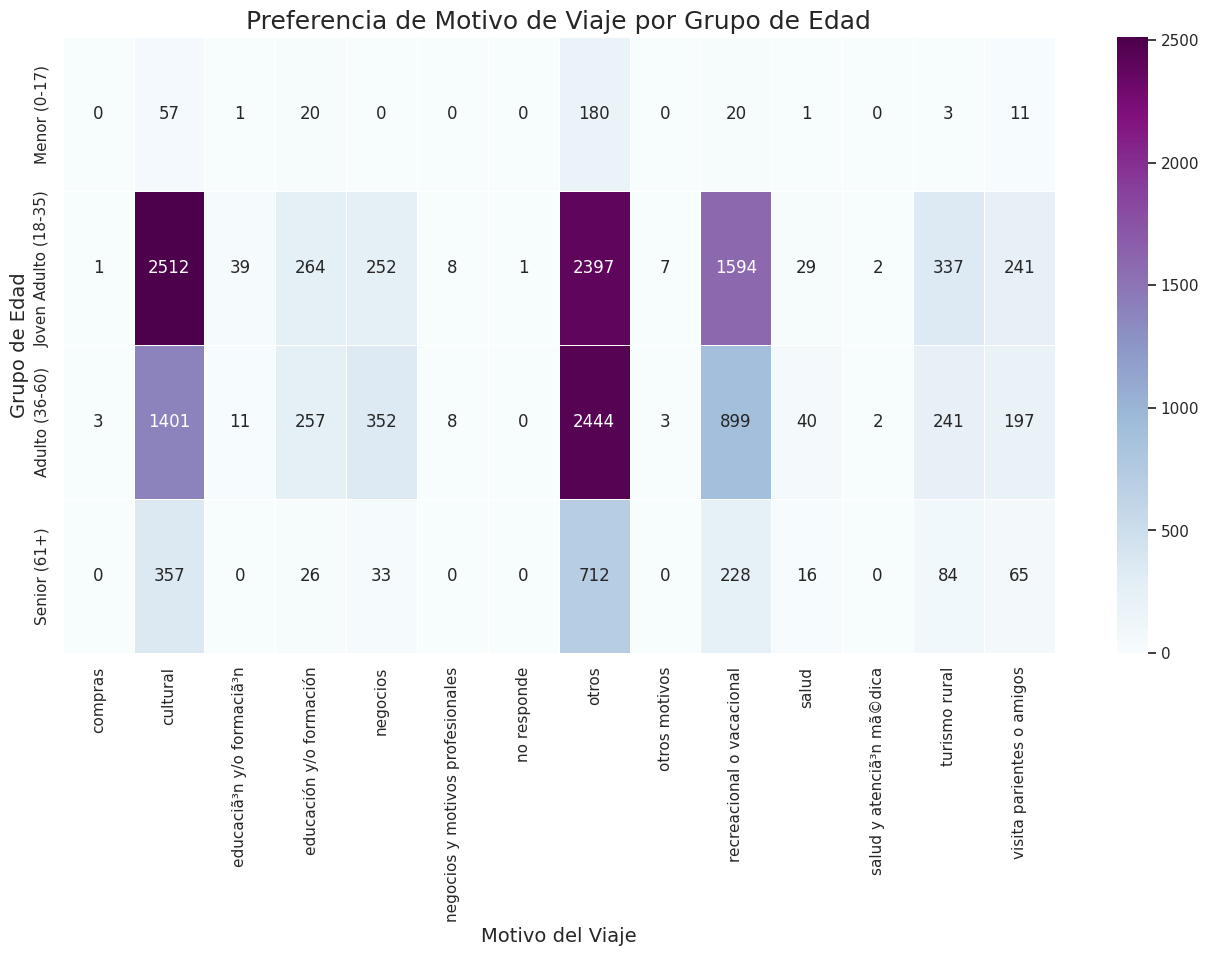

In [417]:
# 11.4 Preferencias de Viaje por Grupo de Edad
logging.info("Generando Heatmap: Preferencias de Viaje por Grupo de Edad.")

# Razón del Gráfico: Mapa de Calor (Heatmap)
# Esta es la mejor visualización para ver la "intensidad" de la relación entre dos
# variables categóricas. El color nos mostrará rápidamente qué motivos de viaje son
# más populares dentro de cada segmento de edad. Es mucho más claro que múltiples
# gráficos de barras. Responde a la pregunta:
# "¿Los 'Jóvenes Adultos' prefieren el turismo cultural mientras que los 'Senior' prefieren el turismo rural?"

# Creamos una tabla cruzada para contar las combinaciones de grupo_edad y motivo_viaje
preferencias_edad = pd.crosstab(df_visitantes_limpio['grupo_edad'], 
                                df_visitantes_limpio['motivo_viaje'])

plt.figure(figsize=(16, 8))
sns.heatmap(preferencias_edad, 
            cmap='BuPu', 
            annot=True,     # Muestra los números en cada celda
            fmt='d',        # Formato de número entero
            linewidths=.5)

plt.title('Preferencia de Motivo de Viaje por Grupo de Edad', fontsize=18)
plt.xlabel('Motivo del Viaje', fontsize=14)
plt.ylabel('Grupo de Edad', fontsize=14)
plt.show()

2025-09-21 12:38:24,889 - INFO - Fase 11: Iniciando el Análisis Multivariado para descubrir patrones complejos.
2025-09-21 12:38:24,891 - INFO - Generando gráfico (CORREGIDO): Motivo del Viaje por Región de Origen.
/tmp/ipykernel_10754/3223216247.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax, palette='magma', orient='h')
/tmp/ipykernel_10754/3223216247.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax, palette='magma', orient='h')
/tmp/ipykernel_10754/3223216247.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue

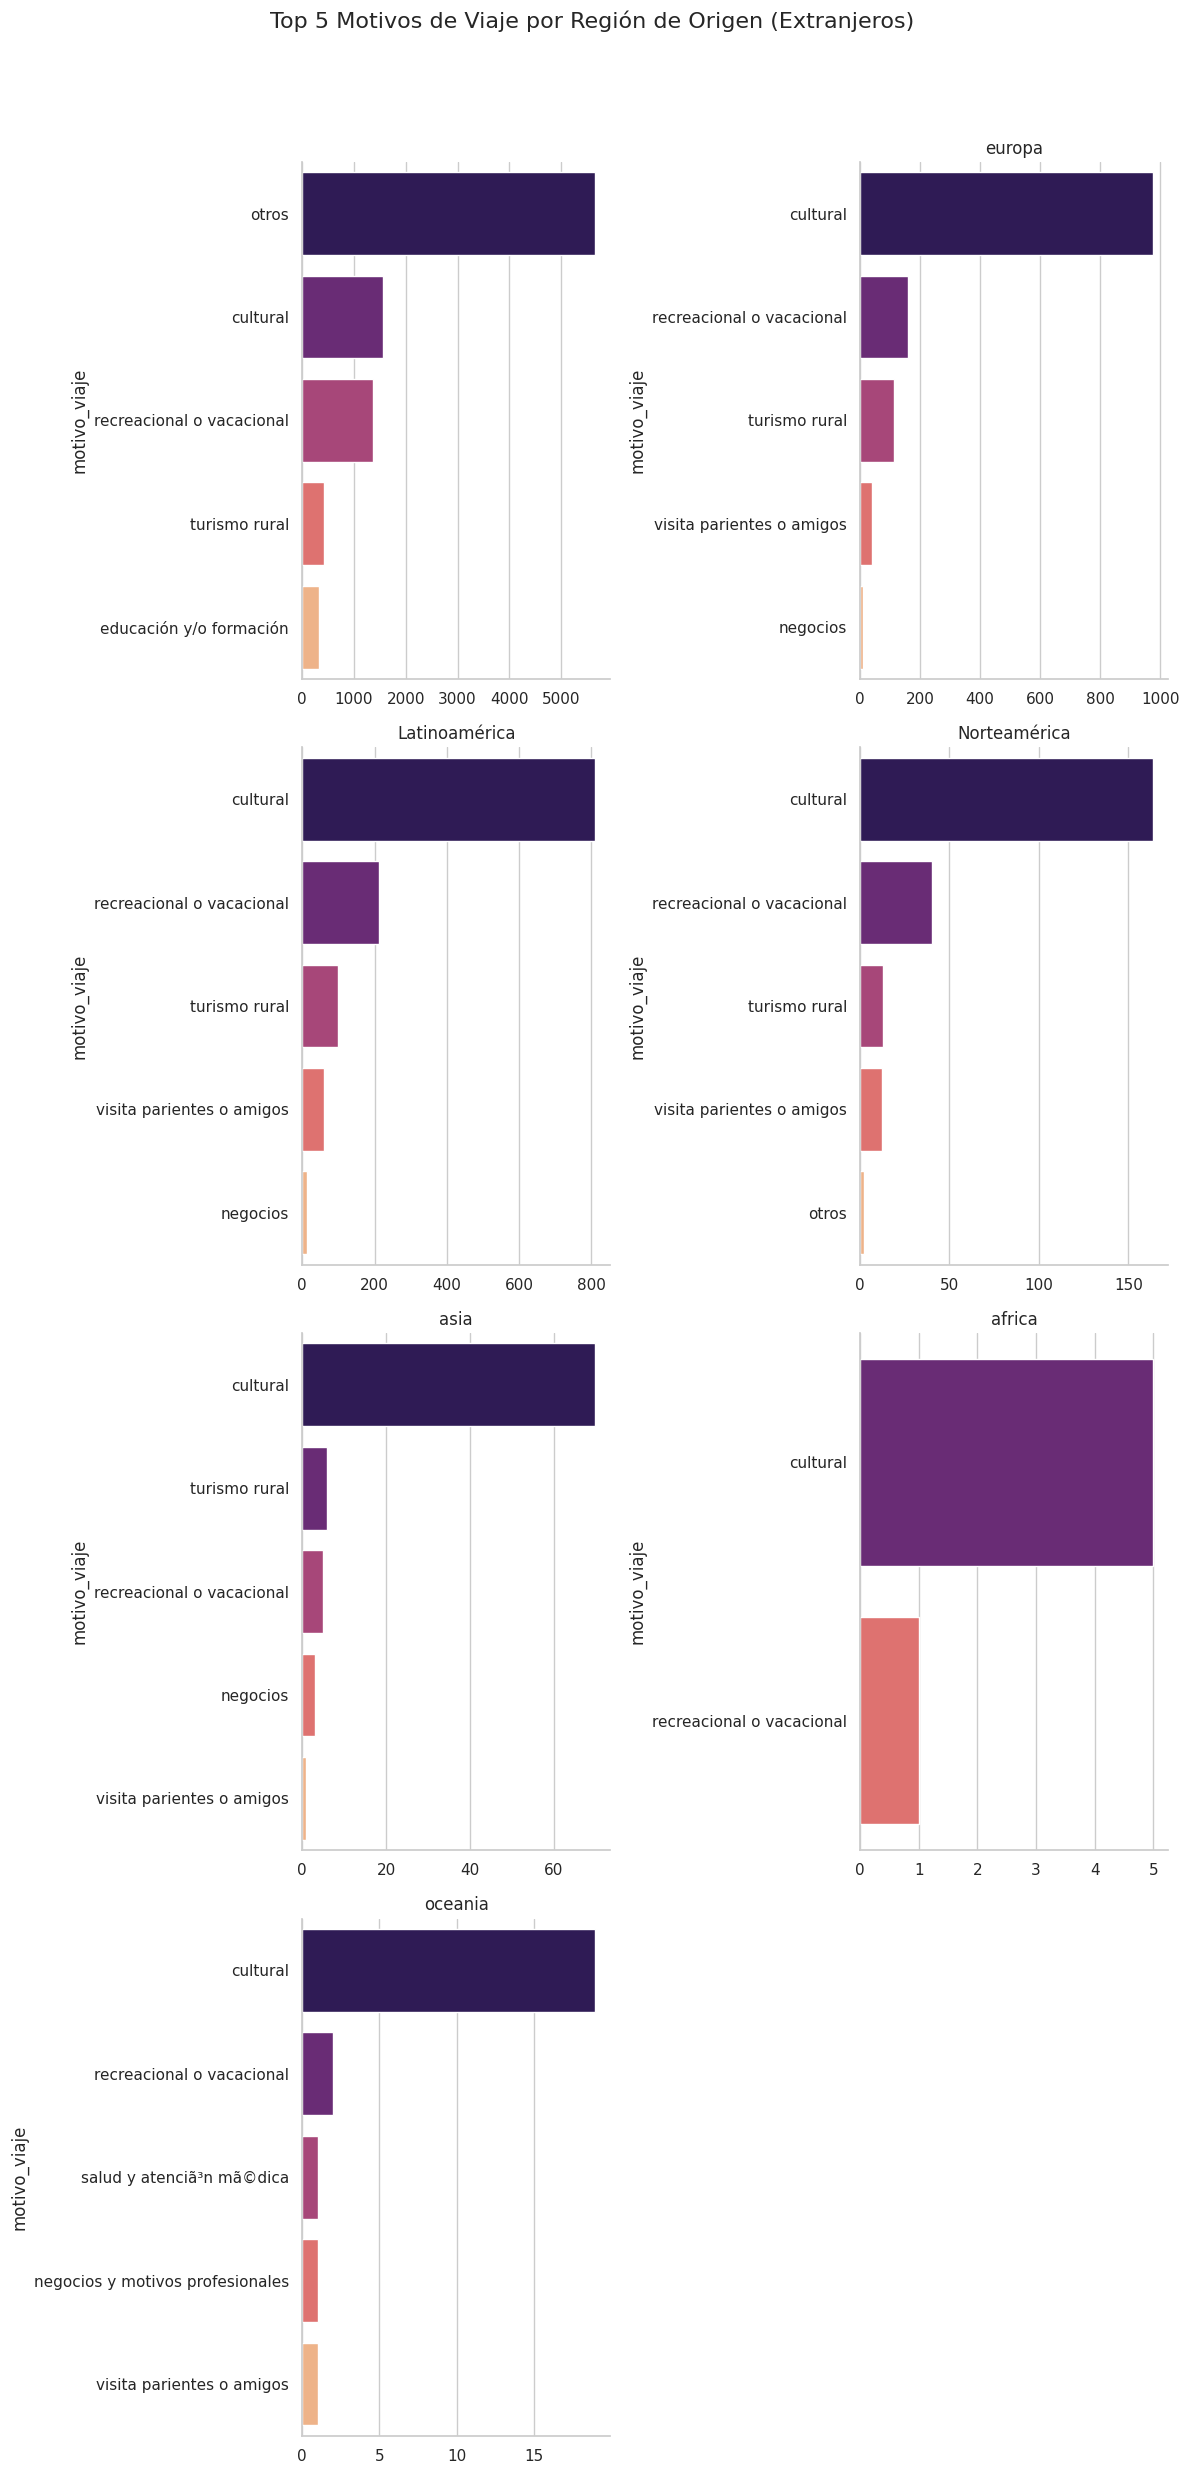

In [418]:
# --- Fase 11: Análisis Multivariado y de Segmentos ---
logging.info("Fase 11: Iniciando el Análisis Multivariado para descubrir patrones complejos.")

# 11.1 Motivo del Viaje por Región de Origen (Extranjeros) - CORREGIDO
logging.info("Generando gráfico (CORREGIDO): Motivo del Viaje por Región de Origen.")

# Razón del Gráfico: Gráfico de Facetas (FacetGrid) con Barras Horizontales
# Para comparar de forma legible los motivos de viaje entre regiones, crearemos un
# mini-gráfico de barras horizontales para cada una. Esto evita que las etiquetas se
# superpongan y hace la comparación mucho más clara.

# 1. Limpiamos y preparamos los datos como antes
df_extranjeros_motivos = df_visitantes_limpio[
    (df_visitantes_limpio['tipo_visitante'] == 'Extranjero') &
    (df_visitantes_limpio['zona_procedencia__visitantes_internacionales'].notna())
].copy()

df_extranjeros_motivos['zona_procedencia'] = df_extranjeros_motivos['zona_procedencia__visitantes_internacionales'].replace({
    'america latina': 'Latinoamérica',
    'norteamerica': 'Norteamérica'
})

# Obtenemos las zonas únicas para crear los subplots
zonas = df_extranjeros_motivos['zona_procedencia'].unique()

# 2. Creamos la figura usando FacetGrid, pero sin mapear directamente el gráfico
g = sns.FacetGrid(df_extranjeros_motivos, 
                  col="zona_procedencia", 
                  col_wrap=2, # Ajustamos a 3 por fila para mejor distribución
                  height=6, 
                  sharex=False, # El eje X puede variar entre gráficos
                  sharey=False) # El eje Y también puede variar

# 3. Iteramos sobre cada subplot (eje) en la grilla para dibujar manualmente
for i, zona in enumerate(zonas):
    ax = g.axes[i] # Seleccionamos el subplot actual
    
    # Filtramos los datos para la zona actual y calculamos su Top 5 de motivos
    datos_zona = df_extranjeros_motivos[df_extranjeros_motivos['zona_procedencia'] == zona]
    counts = datos_zona['motivo_viaje'].value_counts().nlargest(5)
    
    # Dibujamos un gráfico de barras horizontales en el subplot actual
    sns.barplot(x=counts.values, y=counts.index, ax=ax, palette='magma', orient='h')
    ax.set_title(zona) # Establecemos el título del subplot

# Configuramos el título general y ajustamos el layout
g.fig.suptitle('Top 5 Motivos de Viaje por Región de Origen (Extranjeros)', y=1.03, fontsize=16)
plt.tight_layout()
plt.show()

2025-09-21 12:38:25,879 - INFO - Generando gráfico: Composición de Motivos de Viaje por Mes.


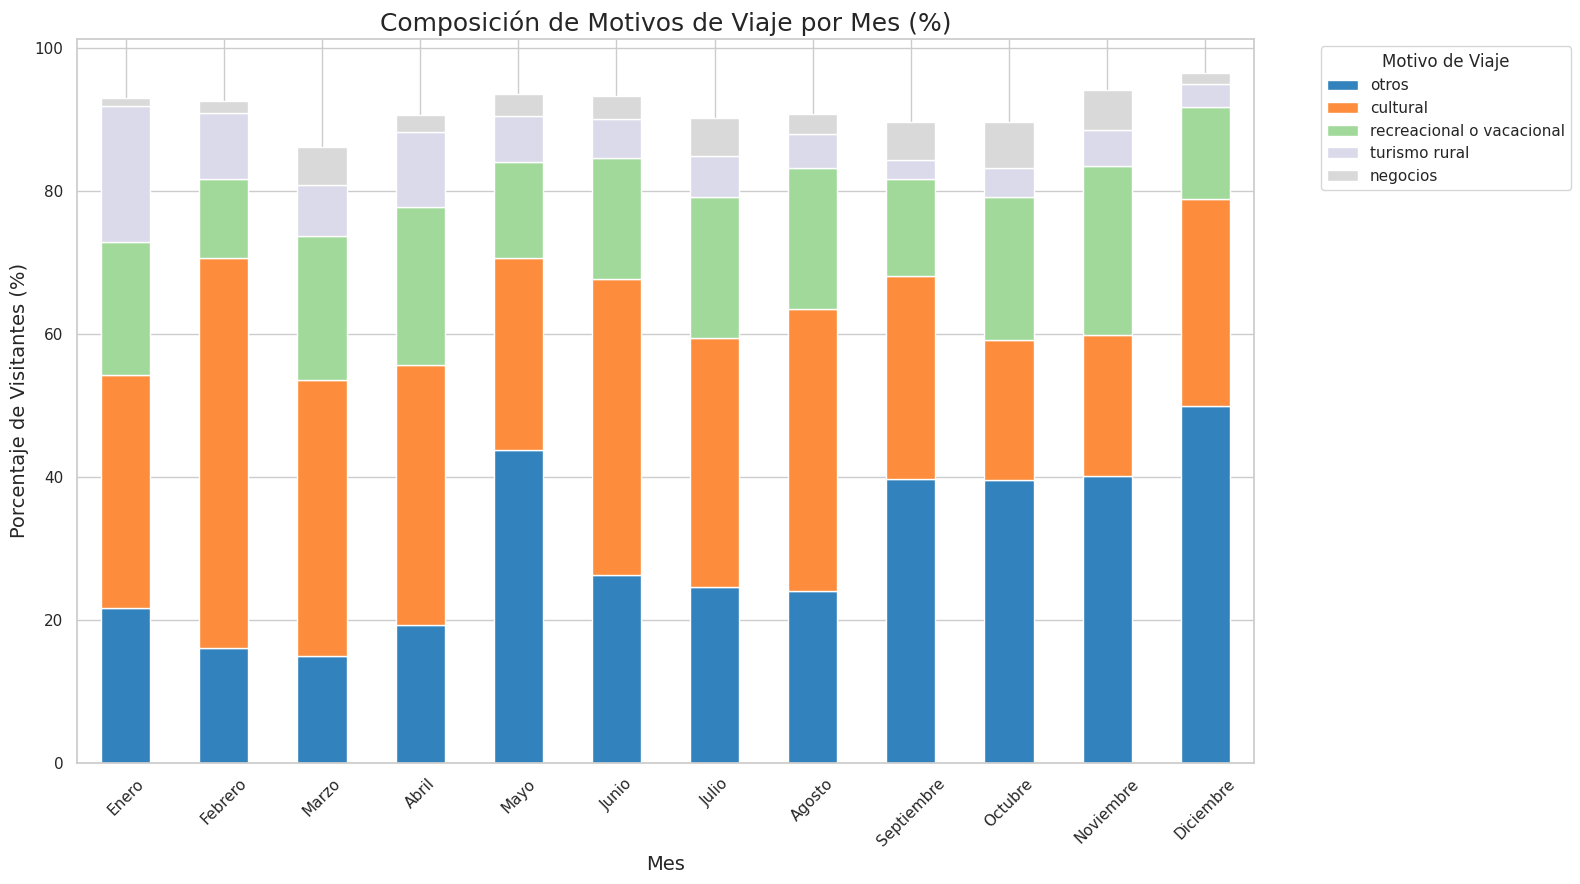

In [419]:
# 11.2 Composición de Motivos de Viaje a lo Largo del Año
logging.info("Generando gráfico: Composición de Motivos de Viaje por Mes.")

# Razón del Gráfico: Gráfico de Barras Apiladas al 100% sobre el Tiempo
# El heatmap nos mostró CUÁNDO vienen los turistas (volumen). Este gráfico nos
# muestra el PORQUÉ vienen en cada mes (composición). Es ideal para entender
# la naturaleza de las temporadas. Por ejemplo, podemos confirmar si el pico de
# diciembre está dominado por 'recreacional' (Feria) vs. otros meses.

# Preparamos los datos
composicion_mensual = pd.crosstab(df_visitantes_limpio['mes'],
                                 df_visitantes_limpio['motivo_viaje'],
                                 normalize='index') * 100

# Seleccionamos solo los motivos más relevantes para no saturar el gráfico
top_motivos = df_visitantes_limpio['motivo_viaje'].value_counts().nlargest(5).index
composicion_mensual = composicion_mensual[top_motivos]

# Ordenamos los meses
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
composicion_mensual = composicion_mensual.reindex(meses_ordenados)

composicion_mensual.plot(kind='bar', 
                         stacked=True, 
                         figsize=(16, 9),
                         colormap='tab20c')

plt.title('Composición de Motivos de Viaje por Mes (%)', fontsize=18)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Porcentaje de Visitantes (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Motivo de Viaje', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2025-09-21 12:38:26,125 - INFO - Generando gráfico: Duración de Estancia por Motivo de Viaje.
/tmp/ipykernel_10754/1207823560.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='motivo_viaje',


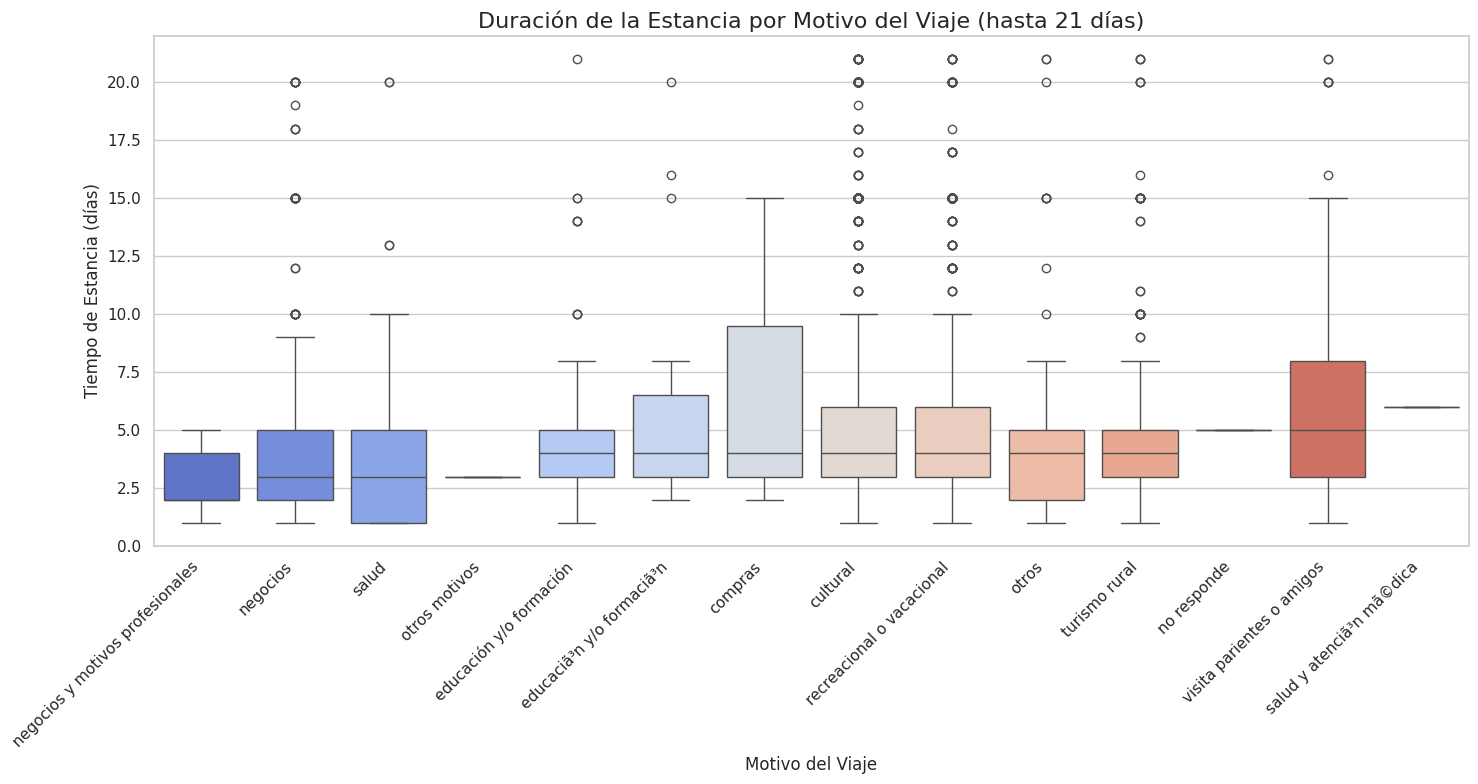

In [420]:
# 11.3 Duración de la Estancia según el Motivo del Viaje
logging.info("Generando gráfico: Duración de Estancia por Motivo de Viaje.")

plt.figure(figsize=(15, 8))

# Razón del Gráfico: Box Plot Múltiple
# Este gráfico nos permite comparar la distribución de una variable numérica (tiempo de estancia)
# a través de diferentes categorías (motivo de viaje). Es perfecto para responder preguntas como:
# "¿Los viajes de negocios son consistentemente más cortos que los vacacionales?" o
# "¿El turismo rural implica estancias más largas?"

# Filtramos outliers para una mejor visualización de las cajas principales
df_filtrado_estancia = df_visitantes_limpio[df_visitantes_limpio['tiempo_de_estancia'] <= 21] # Filtramos a 3 semanas

sns.boxplot(x='motivo_viaje', 
            y='tiempo_de_estancia', 
            data=df_filtrado_estancia,
            order=df_filtrado_estancia.groupby('motivo_viaje')['tiempo_de_estancia'].median().sort_values().index, # Ordena por mediana
            palette='coolwarm')

plt.title('Duración de la Estancia por Motivo del Viaje (hasta 21 días)', fontsize=16)
plt.xlabel('Motivo del Viaje', fontsize=12)
plt.ylabel('Tiempo de Estancia (días)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [427]:
# --- Vista Previa de df_visitantes_limpio ---
print("="*50)
print("PRIMERAS 5 FILAS DE df_visitantes_limpio")
print("="*50)

# Usamos .head() para ver los primeros registros del DataFrame limpio
df_visitantes_limpio.head()

PRIMERAS 5 FILAS DE df_visitantes_limpio


,encuesta,fecha,mes,paa­s_de_procedencia,cuidad,procedencia,zona_procedendia__visitantes_nacionales,zona_procedendia__visitantes_internacionales,sexo,edad_rangos,motivo_viaje,otro_motivo_de_viaje_o_consulta_pit_cual,idioma,alojamiento,tipo_de_transporte,rango_de_tiempo_de_estancia,ano,zona_procedencia__visitantes_nacionales,zona_procedencia__visitantes_internacionales,edad,tiempo_de_estancia,zona_de_procedencia_visitantes__nacionales,zona_de_procedencia__visitantes_internacionales,ciudad,rango_de_tiempo,otro_idioma_cual,otro_alojamiento_cual,pais_de_procedencia,dia_semana,tipo_visitante,grupo_edad
0,1.000,2015-02-03,Febrero,colombia,cali,local,occidente,,femenino,mã¡s de 45 aã±os,turismo rural,,espaã±ol,reside,reside,reside,2015,,,NaN,NaN,,,,,,,,Martes,Extranjero,NaN
1,2.000,2015-02-04,Febrero,canada,quebec,extranjero,,norteamerica,femenino,mã¡s de 45 aã±os,otros,consulta punto de informaciã³n - servicio de t...,inglã©s,vivienda familiar o amigos,aã©reo,mã¡s de 10 noches,2015,,,NaN,NaN,,,,,,,,Miércoles,Extranjero,NaN
2,3.000,2015-02-04,Febrero,francia,paris,extranjero,,europa,femenino,21 - 45 aã±os,cultural,,francã©s,hostal,terrestre pãºblico,mã¡s de 10 noches,2015,,,NaN,NaN,,,,,,,,Miércoles,Extranjero,NaN
3,4.000,2015-02-04,Febrero,francia,paris,extranjero,,europa,masculino,21 - 45 aã±os,cultural,,francã©s,hostal,terrestre pãºblico,mã¡s de 10 noches,2015,,,NaN,NaN,,,,,,,,Miércoles,Extranjero,NaN
4,5.000,2015-02-04,Febrero,suiza,schwyz,extranjero,,europa,masculino,mã¡s de 45 aã±os,cultural,,espaã±ol,vivienda turistica,terrestre pãºblico,mã¡s de 10 noches,2015,,,NaN,NaN,,,,,,,,Miércoles,Extranjero,NaN


In [430]:
# --- Conteo de Valores Únicos por Columna ---
print("\n" + "="*50)
print("CONTEO DE VALORES ÚNICOS POR CADA COLUMNA")
print("="*50)

# Utilizamos el método .nunique() que cuenta la cantidad de valores únicos en cada columna.
# Lo convertimos a un DataFrame para una visualización más ordenada.
conteo_unicos = df_visitantes_limpio.nunique().reset_index()
conteo_unicos.columns = ['columna', 'valores_unicos']

# Ordenamos de mayor a menor para ver las columnas con más variedad primero
print(conteo_unicos.sort_values(by='valores_unicos', ascending=False))


CONTEO DE VALORES ÚNICOS POR CADA COLUMNA
                                            columna  valores_unicos
0                                          encuesta            5091
4                                            cuidad             833
1                                             fecha             754
23                                           ciudad             441
3                              paa­s_de_procedencia             105
19                                             edad              89
27                              pais_de_procedencia              79
20                               tiempo_de_estancia              63
25                                 otro_idioma_cual              62
11         otro_motivo_de_viaje_o_consulta_pit_cual              27
26                            otro_alojamiento_cual              18
15                      rango_de_tiempo_de_estancia              17
10                                     motivo_viaje              15
13   

In [ ]:
# Guardar el DataFrame limpio para uso futuro
df_visitantes_limpio.to_csv('../datos_limpios/limpios_visitantes_unificado.csv', index=False)

In [422]:
# --- Paso de Diagnóstico ---
print("Verificando los años presentes en la columna 'ano' antes de graficar:")
print(df_visitantes_limpio['ano'].value_counts().sort_index())

Verificando los años presentes en la columna 'ano' antes de graficar:
ano
2015    1145
2016    1667
2017    5091
2018    4269
2019    4541
Name: count, dtype: int64


In [423]:
print(df_visitantes_limpio.columns)

Index(['encuesta', 'fecha', 'mes', 'paa­s_de_procedencia', 'cuidad', 'procedencia', 'zona_procedendia__visitantes_nacionales', 'zona_procedendia__visitantes_internacionales', 'sexo', 'edad_rangos', 'motivo_viaje', 'otro_motivo_de_viaje_o_consulta_pit_cual', 'idioma', 'alojamiento', 'tipo_de_transporte', 'rango_de_tiempo_de_estancia', 'ano', 'zona_procedencia__visitantes_nacionales', 'zona_procedencia__visitantes_internacionales', 'edad', 'tiempo_de_estancia', 'zona_de_procedencia_visitantes__nacionales', 'zona_de_procedencia__visitantes_internacionales', 'ciudad', 'rango_de_tiempo', 'otro_idioma_cual', 'otro_alojamiento_cual', 'pais_de_procedencia', 'dia_semana', 'tipo_visitante', 'grupo_edad'], dtype='object')


In [424]:
# --- Diagnóstico Adicional: Cruzar 'ano' vs 'mes' nulos ---
print("Tabla de nulos en la columna 'mes' por cada año:")
print(pd.crosstab(df_visitantes_limpio['ano'], df_visitantes_limpio['mes'].isnull()))

Tabla de nulos en la columna 'mes' por cada año:
mes   False
ano        
2015   1145
2016   1667
2017   5091
2018   4269
2019   4541
